# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [1]:
# Import warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Import the libraries you will be using for analysis

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [3]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 2.2.1
pandas version: 2.2.3
matplotlib version: 3.10.0
seaborn version: 0.13.2


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [4]:
# Try loading one file
df = pd.read_parquet('2023-1.parquet')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3041714 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            floa

In [5]:
df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:32:10   2023-01-01 00:40:36              1.0   
1         2  2023-01-01 00:55:08   2023-01-01 01:01:27              1.0   
2         2  2023-01-01 00:25:04   2023-01-01 00:37:49              1.0   
3         1  2023-01-01 00:03:48   2023-01-01 00:13:25              0.0   
4         2  2023-01-01 00:10:29   2023-01-01 00:21:19              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           0.97         1.0                  N           161           141   
1           1.10         1.0                  N            43           237   
2           2.51         1.0                  N            48           238   
3           1.90         1.0                  N           138             7   
4           1.43         1.0                  N           107            79   

   payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0             2          9.3   1.00      0.5        0.00           0.0   
1             1          7.9   1.00      0.5        4.00           0.0   
2             1         14.9   1.00      0.5       15.00           0.0   
3             1         12.1   7.25      0.5        0.00           0.0   
4             1         11.4   1.00      0.5        3.28           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  airport_fee  
0                    1.0         14.30                   2.5         0.00  
1                    1.0         16.90                   2.5         0.00  
2                    1.0         34.90                   2.5         0.00  
3                    1.0         20.85                   0.0         1.25  
4                    1.0         19.68                   2.5         0.00

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

In [6]:
df["tpep_pickup_hour"] = df["tpep_pickup_datetime"].dt.hour
df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:32:10   2023-01-01 00:40:36              1.0   
1         2  2023-01-01 00:55:08   2023-01-01 01:01:27              1.0   
2         2  2023-01-01 00:25:04   2023-01-01 00:37:49              1.0   
3         1  2023-01-01 00:03:48   2023-01-01 00:13:25              0.0   
4         2  2023-01-01 00:10:29   2023-01-01 00:21:19              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           0.97         1.0                  N           161           141   
1           1.10         1.0                  N            43           237   
2           2.51         1.0                  N            48           238   
3           1.90         1.0                  N           138             7   
4           1.43         1.0                  N           107            79   

   payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0             2          9.3   1.00      0.5        0.00           0.0   
1             1          7.9   1.00      0.5        4.00           0.0   
2             1         14.9   1.00      0.5       15.00           0.0   
3             1         12.1   7.25      0.5        0.00           0.0   
4             1         11.4   1.00      0.5        3.28           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  airport_fee  \
0                    1.0         14.30                   2.5         0.00   
1                    1.0         16.90                   2.5         0.00   
2                    1.0         34.90                   2.5         0.00   
3                    1.0         20.85                   0.0         1.25   
4                    1.0         19.68                   2.5         0.00   

   tpep_pickup_hour  
0                 0  
1                 0  
2                 0  
3                 0  
4                 0

In [7]:
df["tpep_pickup_date"] = df["tpep_pickup_datetime"].dt.date
df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:32:10   2023-01-01 00:40:36              1.0   
1         2  2023-01-01 00:55:08   2023-01-01 01:01:27              1.0   
2         2  2023-01-01 00:25:04   2023-01-01 00:37:49              1.0   
3         1  2023-01-01 00:03:48   2023-01-01 00:13:25              0.0   
4         2  2023-01-01 00:10:29   2023-01-01 00:21:19              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           0.97         1.0                  N           161           141   
1           1.10         1.0                  N            43           237   
2           2.51         1.0                  N            48           238   
3           1.90         1.0                  N           138             7   
4           1.43         1.0                  N           107            79   

   payment_type  ...  extra  mta_tax  tip_amount  tolls_amount  \
0             2  ...   1.00      0.5        0.00           0.0   
1             1  ...   1.00      0.5        4.00           0.0   
2             1  ...   1.00      0.5       15.00           0.0   
3             1  ...   7.25      0.5        0.00           0.0   
4             1  ...   1.00      0.5        3.28           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  airport_fee  \
0                    1.0         14.30                   2.5         0.00   
1                    1.0         16.90                   2.5         0.00   
2                    1.0         34.90                   2.5         0.00   
3                    1.0         20.85                   0.0         1.25   
4                    1.0         19.68                   2.5         0.00   

   tpep_pickup_hour  tpep_pickup_date  
0                 0        2023-01-01  
1                 0        2023-01-01  
2                 0        2023-01-01  
3                 0        2023-01-01  
4                 0        2023-01-01  

[5 rows x 21 columns]

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [8]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload

In [9]:
# from google.colab import drive
# drive.mount('/content/drive')

In [10]:
# Take a small percentage of entries from each hour of every date.
# Iterating through the monthly data:
#   read a month file -> day -> hour: append sampled data -> move to next hour -> move to next day after 24 hours -> move to next month file
# Create a single dataframe for the year combining all the monthly data

# Select the folder having data files
import os

# Select the folder having data files
os.chdir('/Users/pgovindani/Desktop/AIML-IIITB/Case Studies/EDA_Case_Study/DatasetsDictionary/trip_records')

# Create a list of all the twelve files to read
file_list = os.listdir()

# initialise an empty dataframe
df = pd.DataFrame()


# iterate through the list of files and sample one by one:
for file_name in file_list:
    try:
        # file path for the current file
        file_path = os.path.join(os.getcwd(), file_name)

        # Reading the current file
        df1 = pd.read_parquet(file_path)
        df1["tpep_pickup_date"] = df1["tpep_pickup_datetime"].dt.date
        df1["tpep_pickup_hour"] = df1["tpep_pickup_datetime"].dt.hour

        # We will store the sampled data for the current date in this df by appending the sampled data from each hour to this
        # After completing iteration through each date, we will append this data to the final dataframe.
        sampled_data = pd.DataFrame()

        # Loop through dates and then loop through every hour of each date
        for each in df1["tpep_pickup_date"].unique():
            each_pickup_date = df1[df1["tpep_pickup_date"] == each]

            # Iterate through each hour of the selected date
            each_pickup_date_hourly_data = each_pickup_date.groupby("tpep_pickup_hour").apply(lambda x : x.sample(frac = 0.05, random_state = 66))
        
            # Sample 5% of the hourly data randomly

            # add data of this hour to the dataframe
            sampled_data = pd.concat([sampled_data,each_pickup_date_hourly_data])
            #print(sampled_data)
        # Concatenate the sampled data of all the dates to a single dataframe
        #df = # we initialised this empty DF earlier
        df = pd.concat([df,sampled_data])
    except Exception as e:
        print(f"Error reading file {file_name}: {e}")
df.size

Error reading file .DS_Store: Could not open Parquet input source '<Buffer>': Parquet magic bytes not found in footer. Either the file is corrupted or this is not a parquet file.
Error reading file data.csv: Could not open Parquet input source '<Buffer>': Parquet magic bytes not found in footer. Either the file is corrupted or this is not a parquet file.
Error reading file sampledData.parquet: 'tpep_pickup_hour' is both an index level and a column label, which is ambiguous.


41720800

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 1896400 entries, (np.int32(0), np.int64(908)) to (np.int32(0), np.int64(3204173))
Data columns (total 22 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_su

After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [12]:
# Store the df in csv/parquet
df.to_parquet("sampledData.parquet",engine="pyarrow")

In [13]:
df_new = pd.read_parquet("sampledData.parquet")
print(df_new)

                          VendorID tpep_pickup_datetime tpep_dropoff_datetime  \
tpep_pickup_hour                                                                
0                908             2  2023-12-01 00:12:46   2023-12-01 00:30:53   
                 79              2  2023-12-01 00:08:12   2023-12-01 00:13:51   
                 2699            2  2023-12-01 00:45:48   2023-12-01 00:55:06   
                 3834            2  2023-12-01 00:17:34   2023-12-01 00:33:18   
                 1217            2  2023-12-01 00:24:19   2023-12-01 00:44:42   
...                            ...                  ...                   ...   
23               3206401         1  2023-06-30 23:09:17   2023-06-30 23:30:55   
                 3204702         2  2023-06-30 23:07:35   2023-06-30 23:13:49   
                 3202904         2  2023-06-30 23:38:23   2023-06-30 23:59:17   
                 3207094         2  2023-06-30 23:19:15   2023-06-30 23:28:58   
0                3204173    

In [14]:
df_new.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  \
tpep_pickup_hour                                                             
0                908          2  2023-12-01 00:12:46   2023-12-01 00:30:53   
                 79           2  2023-12-01 00:08:12   2023-12-01 00:13:51   
                 2699         2  2023-12-01 00:45:48   2023-12-01 00:55:06   
                 3834         2  2023-12-01 00:17:34   2023-12-01 00:33:18   
                 1217         2  2023-12-01 00:24:19   2023-12-01 00:44:42   

                       passenger_count  trip_distance  RatecodeID  \
tpep_pickup_hour                                                    
0                908               1.0           4.12         1.0   
                 79                2.0           1.03         1.0   
                 2699              1.0           1.92         1.0   
                 3834              1.0           3.16         1.0   
                 1217              1.0           3.81         1.0   

                      store_and_fwd_flag  PULocationID  DOLocationID  \
tpep_pickup_hour                                                       
0                908                   N           114           230   
                 79                    N           170           100   
                 2699                  N           246           142   
                 3834                  N           161           145   
                 1217                  N           249           237   

                       payment_type  ...  mta_tax  tip_amount  tolls_amount  \
tpep_pickup_hour                     ...                                      
0                908              1  ...      0.5        4.00           0.0   
                 79               1  ...      0.5        2.58           0.0   
                 2699             1  ...      0.5        3.42           0.0   
                 3834             1  ...      0.5        0.00           0.0   
                 1217             2  ...      0.5        0.00           0.0   

                       improvement_surcharge  total_amount  \
tpep_pickup_hour                                             
0                908                     1.0         30.90   
                 79                      1.0         15.48   
                 2699                    1.0         20.52   
                 3834                    1.0         22.70   
                 1217                    1.0         26.90   

                       congestion_surcharge  Airport_fee  tpep_pickup_date  \
tpep_pickup_hour                                                             
0                908                    2.5          0.0        2023-12-01   
                 79                     2.5          0.0        2023-12-01   
                 2699                   2.5          0.0        2023-12-01   
                 3834                   2.5          0.0        2023-12-01   
                 1217                   2.5          0.0        2023-12-01   

                       tpep_pickup_hour airport_fee  
tpep_pickup_hour                                     
0                908                  0         NaN  
                 79                   0         NaN  
                 2699                 0         NaN  
                 3834                 0         NaN  
                 1217                 0         NaN  

[5 rows x 22 columns]

## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [15]:
# Load the new data file

df = pd.read_parquet("sampledData.parquet")
#print(df_new)

In [16]:
df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  \
tpep_pickup_hour                                                             
0                908          2  2023-12-01 00:12:46   2023-12-01 00:30:53   
                 79           2  2023-12-01 00:08:12   2023-12-01 00:13:51   
                 2699         2  2023-12-01 00:45:48   2023-12-01 00:55:06   
                 3834         2  2023-12-01 00:17:34   2023-12-01 00:33:18   
                 1217         2  2023-12-01 00:24:19   2023-12-01 00:44:42   

                       passenger_count  trip_distance  RatecodeID  \
tpep_pickup_hour                                                    
0                908               1.0           4.12         1.0   
                 79                2.0           1.03         1.0   
                 2699              1.0           1.92         1.0   
                 3834              1.0           3.16         1.0   
                 1217              1.0           3.81         1.0   

                      store_and_fwd_flag  PULocationID  DOLocationID  \
tpep_pickup_hour                                                       
0                908                   N           114           230   
                 79                    N           170           100   
                 2699                  N           246           142   
                 3834                  N           161           145   
                 1217                  N           249           237   

                       payment_type  ...  mta_tax  tip_amount  tolls_amount  \
tpep_pickup_hour                     ...                                      
0                908              1  ...      0.5        4.00           0.0   
                 79               1  ...      0.5        2.58           0.0   
                 2699             1  ...      0.5        3.42           0.0   
                 3834             1  ...      0.5        0.00           0.0   
                 1217             2  ...      0.5        0.00           0.0   

                       improvement_surcharge  total_amount  \
tpep_pickup_hour                                             
0                908                     1.0         30.90   
                 79                      1.0         15.48   
                 2699                    1.0         20.52   
                 3834                    1.0         22.70   
                 1217                    1.0         26.90   

                       congestion_surcharge  Airport_fee  tpep_pickup_date  \
tpep_pickup_hour                                                             
0                908                    2.5          0.0        2023-12-01   
                 79                     2.5          0.0        2023-12-01   
                 2699                   2.5          0.0        2023-12-01   
                 3834                   2.5          0.0        2023-12-01   
                 1217                   2.5          0.0        2023-12-01   

                       tpep_pickup_hour airport_fee  
tpep_pickup_hour                                     
0                908                  0         NaN  
                 79                   0         NaN  
                 2699                 0         NaN  
                 3834                 0         NaN  
                 1217                 0         NaN  

[5 rows x 22 columns]

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [17]:
# Fix the index and drop any columns that are not needed
df.reset_index(inplace=True, drop=True, level = None)


In [18]:
df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-12-01 00:12:46   2023-12-01 00:30:53              1.0   
1         2  2023-12-01 00:08:12   2023-12-01 00:13:51              2.0   
2         2  2023-12-01 00:45:48   2023-12-01 00:55:06              1.0   
3         2  2023-12-01 00:17:34   2023-12-01 00:33:18              1.0   
4         2  2023-12-01 00:24:19   2023-12-01 00:44:42              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           4.12         1.0                  N           114           230   
1           1.03         1.0                  N           170           100   
2           1.92         1.0                  N           246           142   
3           3.16         1.0                  N           161           145   
4           3.81         1.0                  N           249           237   

   payment_type  ...  mta_tax  tip_amount  tolls_amount  \
0             1  ...      0.5        4.00           0.0   
1             1  ...      0.5        2.58           0.0   
2             1  ...      0.5        3.42           0.0   
3             1  ...      0.5        0.00           0.0   
4             2  ...      0.5        0.00           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  Airport_fee  \
0                    1.0         30.90                   2.5          0.0   
1                    1.0         15.48                   2.5          0.0   
2                    1.0         20.52                   2.5          0.0   
3                    1.0         22.70                   2.5          0.0   
4                    1.0         26.90                   2.5          0.0   

   tpep_pickup_date  tpep_pickup_hour airport_fee  
0        2023-12-01                 0         NaN  
1        2023-12-01                 0         NaN  
2        2023-12-01                 0         NaN  
3        2023-12-01                 0         NaN  
4        2023-12-01                 0         NaN  

[5 rows x 22 columns]

**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [19]:
df.loc[df["Airport_fee"].isna(), "Airport_fee_bool"] = True
df.loc[df["Airport_fee"].notna(), "Airport_fee_bool"] = False
df.loc[df["airport_fee"].isna(), "airport_fee_bool"] = True
df.loc[df["airport_fee"].notna(), "airport_fee_bool"] = False
df[(df["Airport_fee_bool"] == False) & (df["airport_fee_bool"] == False)]

Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, store_and_fwd_flag, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, Airport_fee, tpep_pickup_date, tpep_pickup_hour, airport_fee, Airport_fee_bool, airport_fee_bool]
Index: []

[0 rows x 24 columns]

In [20]:
# Combine the two airport fee columns
#df["combined_airport_fee"] = df[df["Airport_fee_bool"]]
df["combined_airport_fee"] = np.where(df["Airport_fee_bool"].notna(),df["Airport_fee"],np.where(df["airport_fee_bool"].notna(), df["airport_fee"], 0))

In [21]:
df = df.drop(columns=["Airport_fee_bool","airport_fee_bool","Airport_fee","airport_fee"])

In [22]:
df["RatecodeID"].describe()

count    1.831624e+06
mean     1.648941e+00
std      7.477330e+00
min      1.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      1.000000e+00
max      9.900000e+01
Name: RatecodeID, dtype: float64

In [23]:
# Remove rows with invalid Rate code Id
df[df["RatecodeID"] > 6]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
452             1  2023-12-01 05:57:38   2023-12-01 06:48:55              1.0   
459             1  2023-12-01 05:12:41   2023-12-01 05:47:55              1.0   
461             1  2023-12-01 05:35:03   2023-12-01 06:04:57              1.0   
467             1  2023-12-01 06:09:07   2023-12-01 06:10:30              1.0   
491             1  2023-12-01 06:23:19   2023-12-01 06:58:58              1.0   
...           ...                  ...                   ...              ...   
1893592         1  2023-06-30 13:37:29   2023-06-30 13:53:06              1.0   
1894049         1  2023-06-30 15:35:32   2023-06-30 16:01:31              1.0   
1894114         1  2023-06-30 15:13:15   2023-06-30 16:23:58              1.0   
1895523         1  2023-06-30 20:06:33   2023-06-30 20:49:14              1.0   
1895688         1  2023-06-30 20:27:19   2023-06-30 21:03:50              1.0   

         trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
452               17.3        99.0                  N           203   
459                2.7        99.0                  N           168   
461                6.9        99.0                  N           177   
467                0.0        99.0                  N            79   
491                6.1        99.0                  N           166   
...                ...         ...                ...           ...   
1893592            1.5        99.0                  N           260   
1894049            2.5        99.0                  N           226   
1894114           13.0        99.0                  N           140   
1895523           15.2        99.0                  N           182   
1895688            0.0        99.0                  N            44   

         DOLocationID  payment_type  ...  extra  mta_tax  tip_amount  \
452                75             1  ...    0.0      0.5         0.0   
459                76             1  ...    0.0      0.5         0.0   
461               145             1  ...    0.0      0.5         0.0   
467                79             1  ...    0.0      0.5         0.0   
491                82             1  ...    0.0      0.5         0.0   
...               ...           ...  ...    ...      ...         ...   
1893592            82             1  ...    0.0      0.5         0.0   
1894049           173             1  ...    0.0      0.5         0.0   
1894114            38             1  ...    0.0      0.5         0.0   
1895523            35             1  ...    0.0      0.5         0.0   
1895688            55             1  ...    0.0      0.5         0.0   

         tolls_amount  improvement_surcharge  total_amount  \
452              6.94                    1.0         63.94   
459              6.94                    1.0         59.94   
461              0.00                    1.0         28.00   
467              6.94                    1.0         37.94   
491              0.00                    1.0         31.00   
...               ...                    ...           ...   
1893592          0.00                    1.0         19.00   
1894049          0.00                    1.0         21.00   
1894114          0.00                    1.0         55.00   
1895523          6.55                    1.0         57.55   
1895688         13.10                    1.0         67.80   

         congestion_surcharge  tpep_pickup_date tpep_pickup_hour  \
452                       0.0        2023-12-01                5   
459                       0.0        2023-12-01                5   
461                       0.0        2023-12-01                5   
467                       0.0        2023-12-01                6   
491                       0.0        2023-12-01                6   
...                       ...               ...              ...   
1893592                   0.0        2023-06-30               13   
1894049                   0.0

In [24]:
df[(df["fare_amount"] <= 0) & (df["total_amount"] > 0)].shape

(267, 21)

In [25]:
df[df["fare_amount"] <= 0]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
1370            1  2023-12-01 10:26:40   2023-12-01 10:36:13              0.0   
4023            1  2023-12-01 18:38:52   2023-12-01 18:38:52              1.0   
6569            1  2023-12-02 00:15:43   2023-12-02 00:33:07              NaN   
7120            1  2023-12-02 03:22:51   2023-12-02 03:23:36              2.0   
18066           1  2023-12-04 07:04:33   2023-12-04 07:06:21              1.0   
...           ...                  ...                   ...              ...   
1887011         2  2023-06-29 07:23:04   2023-06-29 07:23:09              1.0   
1890495         2  2023-06-29 19:37:01   2023-06-29 19:38:36              1.0   
1893682         1  2023-06-30 13:59:58   2023-06-30 14:00:11              1.0   
1894688         1  2023-06-30 17:31:30   2023-06-30 18:48:21              1.0   
1895785         2  2023-06-30 21:21:53   2023-06-30 21:22:01              1.0   

         trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
1370              1.60         1.0                  N           238   
4023              0.00         5.0                  Y           152   
6569              0.90         NaN               None           163   
7120              1.40         5.0                  N            90   
18066             0.10         1.0                  N            79   
...                ...         ...                ...           ...   
1887011           0.00         1.0                  N           246   
1890495           0.02         1.0                  N           141   
1893682           0.00         1.0                  N            75   
1894688          19.30         5.0                  N           132   
1895785           0.00         1.0                  N           264   

         DOLocationID  payment_type  ...  extra  mta_tax  tip_amount  \
1370              166             4  ...   0.00      0.0         0.0   
4023              264             2  ...   0.00      0.0         0.0   
6569              161             0  ...   0.00      0.0         0.0   
7120               90             2  ...   0.00      0.0         0.0   
18066              79             4  ...   0.00      0.0         0.0   
...               ...           ...  ...    ...      ...         ...   
1887011           246             2  ...   0.00     -0.5         0.0   
1890495           141             2  ...   0.00     -0.5         0.0   
1893682            75             1  ...   0.00      0.0         0.0   
1894688           232             3  ...   9.25      0.0         0.0   
1895785           264             1  ...   0.00      0.0         0.0   

         tolls_amount  improvement_surcharge  total_amount  \
1370              0.0                    0.0          0.00   
4023              0.0                    1.0          1.00   
6569              0.0                    0.0          0.00   
7120              0.0                    1.0          1.00   
18066             0.0                    0.0          0.00   
...               ...                    ...           ...   
1887011           0.0                   -1.0         -4.00   
1890495           0.0                   -1.0         -4.00   
1893682           0.0                    0.0          0.00   
1894688           0.0                    1.0         10.25   
1895785           0.0                    0.0          0.00   

         congestion_surcharge  tpep_pickup_date tpep_pickup_hour  \
1370                      0.0        2023-12-01               10   
4023                      0.0        2023-12-01               18   
6569                      NaN        2023-12-02                0   
7120                      0.0        2023-12-02                3   
18066                     0.0        2023-12-04                7   
...                       ...               ...              ...   
1887011                  -2.5        2023-06-29                7   
1890495                  -2.5

**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [26]:
# check where values of fare amount are negative

df[df["fare_amount"] < 0]

Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, store_and_fwd_flag, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, tpep_pickup_date, tpep_pickup_hour, combined_airport_fee]
Index: []

[0 rows x 21 columns]

Did you notice something different in the `RatecodeID` column for above records?

In [27]:
# Analyse RatecodeID for the negative fare amounts

df[df["RatecodeID"] > 6]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
452             1  2023-12-01 05:57:38   2023-12-01 06:48:55              1.0   
459             1  2023-12-01 05:12:41   2023-12-01 05:47:55              1.0   
461             1  2023-12-01 05:35:03   2023-12-01 06:04:57              1.0   
467             1  2023-12-01 06:09:07   2023-12-01 06:10:30              1.0   
491             1  2023-12-01 06:23:19   2023-12-01 06:58:58              1.0   
...           ...                  ...                   ...              ...   
1893592         1  2023-06-30 13:37:29   2023-06-30 13:53:06              1.0   
1894049         1  2023-06-30 15:35:32   2023-06-30 16:01:31              1.0   
1894114         1  2023-06-30 15:13:15   2023-06-30 16:23:58              1.0   
1895523         1  2023-06-30 20:06:33   2023-06-30 20:49:14              1.0   
1895688         1  2023-06-30 20:27:19   2023-06-30 21:03:50              1.0   

         trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
452               17.3        99.0                  N           203   
459                2.7        99.0                  N           168   
461                6.9        99.0                  N           177   
467                0.0        99.0                  N            79   
491                6.1        99.0                  N           166   
...                ...         ...                ...           ...   
1893592            1.5        99.0                  N           260   
1894049            2.5        99.0                  N           226   
1894114           13.0        99.0                  N           140   
1895523           15.2        99.0                  N           182   
1895688            0.0        99.0                  N            44   

         DOLocationID  payment_type  ...  extra  mta_tax  tip_amount  \
452                75             1  ...    0.0      0.5         0.0   
459                76             1  ...    0.0      0.5         0.0   
461               145             1  ...    0.0      0.5         0.0   
467                79             1  ...    0.0      0.5         0.0   
491                82             1  ...    0.0      0.5         0.0   
...               ...           ...  ...    ...      ...         ...   
1893592            82             1  ...    0.0      0.5         0.0   
1894049           173             1  ...    0.0      0.5         0.0   
1894114            38             1  ...    0.0      0.5         0.0   
1895523            35             1  ...    0.0      0.5         0.0   
1895688            55             1  ...    0.0      0.5         0.0   

         tolls_amount  improvement_surcharge  total_amount  \
452              6.94                    1.0         63.94   
459              6.94                    1.0         59.94   
461              0.00                    1.0         28.00   
467              6.94                    1.0         37.94   
491              0.00                    1.0         31.00   
...               ...                    ...           ...   
1893592          0.00                    1.0         19.00   
1894049          0.00                    1.0         21.00   
1894114          0.00                    1.0         55.00   
1895523          6.55                    1.0         57.55   
1895688         13.10                    1.0         67.80   

         congestion_surcharge  tpep_pickup_date tpep_pickup_hour  \
452                       0.0        2023-12-01                5   
459                       0.0        2023-12-01                5   
461                       0.0        2023-12-01                5   
467                       0.0        2023-12-01                6   
491                       0.0        2023-12-01                6   
...                       ...               ...              ...   
1893592                   0.0        2023-06-30               13   
1894049                   0.0

In [28]:
# Deleting rows where fare_amount is zero; however RatecodeID is not valid 
df = df[(df["fare_amount"] >= 0) & (df["RatecodeID"].notna())]

In [29]:
df.shape

(1831624, 21)

In [30]:
df[(df["total_amount"] < 0)]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
161506          2  2023-12-30 17:46:39   2023-12-30 17:46:50              2.0   
187928          2  2023-04-10 07:20:47   2023-04-10 07:20:57              2.0   
247497          2  2023-04-19 13:44:46   2023-04-19 14:39:32              1.0   
252106          2  2023-04-14 09:13:39   2023-04-14 09:13:52              1.0   
274776          2  2023-04-25 12:13:21   2023-04-25 12:26:46              1.0   
...           ...                  ...                   ...              ...   
1792317         2  2023-06-11 14:08:41   2023-06-11 14:25:32              1.0   
1867486         2  2023-06-25 09:16:22   2023-06-25 09:26:04              2.0   
1870303         2  2023-06-25 21:59:11   2023-06-25 22:21:50              1.0   
1887011         2  2023-06-29 07:23:04   2023-06-29 07:23:09              1.0   
1890495         2  2023-06-29 19:37:01   2023-06-29 19:38:36              1.0   

         trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
161506            0.01         2.0                  N           163   
187928            0.02         2.0                  N           229   
247497           17.44         2.0                  N           132   
252106            0.06         2.0                  N           138   
274776            1.27         1.0                  N           163   
...                ...         ...                ...           ...   
1792317           0.00         5.0                  N           231   
1867486           1.90         1.0                  N           142   
1870303           9.62         1.0                  N           138   
1887011           0.00         1.0                  N           246   
1890495           0.02         1.0                  N           141   

         DOLocationID  payment_type  ...  extra  mta_tax  tip_amount  \
161506            163             2  ...    0.0     -0.5         0.0   
187928            229             2  ...    0.0     -0.5         0.0   
247497            164             2  ...    0.0     -0.5         0.0   
252106            138             2  ...    0.0     -0.5         0.0   
274776            140             2  ...    0.0     -0.5         0.0   
...               ...           ...  ...    ...      ...         ...   
1792317           231             2  ...    0.0      0.0         0.0   
1867486            50             2  ...    0.0     -0.5         0.0   
1870303           238             2  ...    0.0     -0.5         0.0   
1887011           246             2  ...    0.0     -0.5         0.0   
1890495           141             2  ...    0.0     -0.5         0.0   

         tolls_amount  improvement_surcharge  total_amount  \
161506            0.0                   -1.0         -4.00   
187928            0.0                   -1.0         -4.00   
247497            0.0                   -1.0         -5.75   
252106            0.0                   -1.0         -3.25   
274776            0.0                   -1.0         -4.00   
...               ...                    ...           ...   
1792317           0.0                   -1.0         -3.50   
1867486           0.0                   -1.0         -4.00   
1870303           0.0                   -1.0         -5.75   
1887011           0.0                   -1.0         -4.00   
1890495           0.0                   -1.0         -4.00   

         congestion_surcharge  tpep_pickup_date tpep_pickup_hour  \
161506                   -2.5        2023-12-30               17   
187928                   -2.5        2023-04-10                7   
247497                   -2.5        2023-04-19               13   
252106                    0.0        2023-04-14                9   
274776                   -2.5        2023-04-25               12   
...                       ...               ...              ...   
1792317                  -2.5        2023-06-11               14   
1867486                  -2.5

In [31]:
df[df["RatecodeID"] > 6]["RatecodeID"].value_counts()

RatecodeID
99.0    10712
Name: count, dtype: int64

In [32]:
# Find which columns have negative values

df[(df["fare_amount"] <= 0) & (df["total_amount"] > 0)]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
4023            1  2023-12-01 18:38:52   2023-12-01 18:38:52              1.0   
7120            1  2023-12-02 03:22:51   2023-12-02 03:23:36              2.0   
19452           2  2023-12-04 13:02:14   2023-12-04 13:07:05              1.0   
21629           1  2023-12-04 19:10:34   2023-12-04 19:10:34              1.0   
34546           1  2023-12-06 22:15:34   2023-12-06 22:16:09              1.0   
...           ...                  ...                   ...              ...   
1859303         1  2023-06-23 19:03:04   2023-06-23 19:47:18              1.0   
1860290         1  2023-06-23 22:38:37   2023-06-23 22:38:51              1.0   
1866099         1  2023-06-24 23:48:07   2023-06-24 23:49:25              1.0   
1885227         1  2023-06-28 19:09:55   2023-06-28 19:33:44              1.0   
1894688         1  2023-06-30 17:31:30   2023-06-30 18:48:21              1.0   

         trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
4023              0.00         5.0                  Y           152   
7120              1.40         5.0                  N            90   
19452             0.44         1.0                  N           162   
21629             0.00         5.0                  Y           132   
34546             0.10         5.0                  N           265   
...                ...         ...                ...           ...   
1859303          18.20         5.0                  N           233   
1860290           0.00         5.0                  N           132   
1866099           0.30         5.0                  N           216   
1885227           3.60         5.0                  N           265   
1894688          19.30         5.0                  N           132   

         DOLocationID  payment_type  ...  extra  mta_tax  tip_amount  \
4023              264             2  ...   0.00      0.0         0.0   
7120               90             2  ...   0.00      0.0         0.0   
19452             237             2  ...   0.00      0.5         0.0   
21629             264             2  ...   1.75      0.0         0.0   
34546             265             3  ...   0.00      0.0         0.0   
...               ...           ...  ...    ...      ...         ...   
1859303           265             3  ...   0.00      0.0         0.0   
1860290           132             4  ...   1.75      0.0         0.0   
1866099           216             3  ...   0.00      0.0         0.0   
1885227            74             3  ...   1.75      0.0         0.0   
1894688           232             3  ...   9.25      0.0         0.0   

         tolls_amount  improvement_surcharge  total_amount  \
4023             0.00                    1.0          1.00   
7120             0.00                    1.0          1.00   
19452            0.00                    1.0          4.00   
21629            0.00                    0.0          1.75   
34546            0.00                    1.0          1.00   
...               ...                    ...           ...   
1859303          6.55                    1.0          7.55   
1860290          0.00                    1.0          2.75   
1866099          0.00                    1.0          1.00   
1885227          0.00                    1.0          2.75   
1894688          0.00                    1.0         10.25   

         congestion_surcharge  tpep_pickup_date tpep_pickup_hour  \
4023                      0.0        2023-12-01               18   
7120                      0.0        2023-12-02                3   
19452                     2.5        2023-12-04               13   
21629                     0.0        2023-12-04               19   
34546                     0.0        2023-12-06               22   
...                       ...               ...              ...   
1859303                   0.0        2023-06-23               19   
1860290                   0.0

In [33]:
#Deleting rows where trip_distance is zero or negative and total amount or improvement surcharge is positive. As there is no trip; then there should not be any charges incurred.
df = df[~(((df["improvement_surcharge"] < 0) | (df["total_amount"] < 0))  &  (df["trip_distance"] <= 0))]

In [34]:
df.shape

(1831590, 21)

In [35]:
df[(df["improvement_surcharge"] < 0) | (df["total_amount"] < 0)].shape

(68, 21)

In [36]:
df[(df["improvement_surcharge"] < 0) | (df["total_amount"] < 0)]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
161506          2  2023-12-30 17:46:39   2023-12-30 17:46:50              2.0   
187928          2  2023-04-10 07:20:47   2023-04-10 07:20:57              2.0   
247497          2  2023-04-19 13:44:46   2023-04-19 14:39:32              1.0   
252106          2  2023-04-14 09:13:39   2023-04-14 09:13:52              1.0   
274776          2  2023-04-25 12:13:21   2023-04-25 12:26:46              1.0   
...           ...                  ...                   ...              ...   
1777414         2  2023-06-08 20:49:55   2023-06-08 21:52:57              1.0   
1785338         2  2023-06-10 07:14:11   2023-06-10 07:26:15              2.0   
1867486         2  2023-06-25 09:16:22   2023-06-25 09:26:04              2.0   
1870303         2  2023-06-25 21:59:11   2023-06-25 22:21:50              1.0   
1890495         2  2023-06-29 19:37:01   2023-06-29 19:38:36              1.0   

         trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
161506            0.01         2.0                  N           163   
187928            0.02         2.0                  N           229   
247497           17.44         2.0                  N           132   
252106            0.06         2.0                  N           138   
274776            1.27         1.0                  N           163   
...                ...         ...                ...           ...   
1777414          67.70         4.0                  N           138   
1785338           6.18         1.0                  N            75   
1867486           1.90         1.0                  N           142   
1870303           9.62         1.0                  N           138   
1890495           0.02         1.0                  N           141   

         DOLocationID  payment_type  ...  extra  mta_tax  tip_amount  \
161506            163             2  ...    0.0     -0.5         0.0   
187928            229             2  ...    0.0     -0.5         0.0   
247497            164             2  ...    0.0     -0.5         0.0   
252106            138             2  ...    0.0     -0.5         0.0   
274776            140             2  ...    0.0     -0.5         0.0   
...               ...           ...  ...    ...      ...         ...   
1777414           265             2  ...    0.0      0.0         0.0   
1785338             4             2  ...    0.0     -0.5         0.0   
1867486            50             2  ...    0.0     -0.5         0.0   
1870303           238             2  ...    0.0     -0.5         0.0   
1890495           141             2  ...    0.0     -0.5         0.0   

         tolls_amount  improvement_surcharge  total_amount  \
161506            0.0                   -1.0         -4.00   
187928            0.0                   -1.0         -4.00   
247497            0.0                   -1.0         -5.75   
252106            0.0                   -1.0         -3.25   
274776            0.0                   -1.0         -4.00   
...               ...                    ...           ...   
1777414           0.0                   -1.0         -2.75   
1785338           0.0                   -1.0         -4.00   
1867486           0.0                   -1.0         -4.00   
1870303           0.0                   -1.0         -5.75   
1890495           0.0                   -1.0         -4.00   

         congestion_surcharge  tpep_pickup_date tpep_pickup_hour  \
161506                   -2.5        2023-12-30               17   
187928                   -2.5        2023-04-10                7   
247497                   -2.5        2023-04-19               13   
252106                    0.0        2023-04-14                9   
274776                   -2.5        2023-04-25               12   
...                       ...               ...              ...   
1777414                   0.0        2023-06-08               20   
1785338                  -2.5

In [37]:
#Deleting rows where total amount is positive and trip distance is less than 0.05 miles as its too small distance to travel via cab.
df = df[~((df["total_amount"] <= 0) & (df["trip_distance"] < 0.05))]

In [38]:
df.shape

(1831360, 21)

In [39]:
df[(df["improvement_surcharge"] < 0) | (df["total_amount"] < 0)]["trip_distance"].describe()

count     53.000000
mean       8.361321
std       22.936710
min        0.060000
25%        0.320000
50%        1.900000
75%        8.060000
max      153.540000
Name: trip_distance, dtype: float64

In [40]:
df[(df["passenger_count"].isna()) & (df["trip_distance"] <= 0) & (df["total_amount"] <= 0)]

Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, store_and_fwd_flag, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, tpep_pickup_date, tpep_pickup_hour, combined_airport_fee]
Index: []

[0 rows x 21 columns]

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1831360 entries, 0 to 1896399
Data columns (total 21 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  tpep_pickup_date       obje

In [42]:
# fix these negative values
df["total_amount"] = np.where(df["total_amount"] < 0, -df["total_amount"],df["total_amount"])


In [43]:
df["extra"] = np.where(df["extra"] < 0, -df["extra"],df["extra"])

In [44]:
df["mta_tax"] = np.where(df["mta_tax"] < 0, -df["mta_tax"],df["mta_tax"])

In [45]:
df["improvement_surcharge"] = np.where(df["improvement_surcharge"] < 0, -df["improvement_surcharge"],df["improvement_surcharge"])

In [46]:
df["congestion_surcharge"] = np.where(df["congestion_surcharge"] < 0, -df["congestion_surcharge"],df["congestion_surcharge"])

In [47]:
df["combined_airport_fee"] = np.where(df["combined_airport_fee"] < 0, -df["combined_airport_fee"],df["combined_airport_fee"])

In [48]:
df[df["VendorID"] < 0].shape

(0, 21)

In [49]:
df[df["passenger_count"] < 0].shape

(0, 21)

In [50]:
df[df["payment_type"] < 0].shape

(0, 21)

In [51]:
df[df["payment_type"] < 0].shape

(0, 21)

In [52]:
df[df["fare_amount"] < 0].shape

(0, 21)

In [53]:
df[df["extra"] < 0].shape

(0, 21)

In [54]:
df[df["mta_tax"] < 0].shape

(0, 21)

In [55]:
df[df["tip_amount"] < 0].shape

(0, 21)

In [56]:
df[df["tolls_amount"] < 0].shape

(0, 21)

In [57]:
df[df["improvement_surcharge"] < 0].shape

(0, 21)

In [58]:
df[df["congestion_surcharge"] < 0].shape

(0, 21)

In [59]:
df[df["combined_airport_fee"] < 0].shape

(0, 21)

In [60]:
df[df["RatecodeID"] < 0].shape

(0, 21)

In [61]:
df[df["PULocationID"] < 0].shape

(0, 21)

In [62]:
df[df["DOLocationID"] < 0].shape

(0, 21)

In [63]:
df[df["total_amount"] < 0]

Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, store_and_fwd_flag, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, tpep_pickup_date, tpep_pickup_hour, combined_airport_fee]
Index: []

[0 rows x 21 columns]

### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [64]:
totalRows = df.shape[0]
for each in df.columns:
    print('Column ', each, ' - ', (totalRows - df[each].count())/totalRows)

Column  VendorID  -  0.0
Column  tpep_pickup_datetime  -  0.0
Column  tpep_dropoff_datetime  -  0.0
Column  passenger_count  -  0.0
Column  trip_distance  -  0.0
Column  RatecodeID  -  0.0
Column  store_and_fwd_flag  -  0.0
Column  PULocationID  -  0.0
Column  DOLocationID  -  0.0
Column  payment_type  -  0.0
Column  fare_amount  -  0.0
Column  extra  -  0.0
Column  mta_tax  -  0.0
Column  tip_amount  -  0.0
Column  tolls_amount  -  0.0
Column  improvement_surcharge  -  0.0
Column  total_amount  -  0.0
Column  congestion_surcharge  -  0.0
Column  tpep_pickup_date  -  0.0
Column  tpep_pickup_hour  -  0.0
Column  combined_airport_fee  -  0.08111731172461996


In [65]:
print("Vendor Id null count", df[df["VendorID"].isna() == "True"].shape)
print("tpep_pickup_datetime null count", df[df["tpep_pickup_datetime"].isna() == "True"].shape)
print("tpep_dropoff_datetime Id null count", df[df["tpep_dropoff_datetime"].isna() == "True"].shape)
print("passenger_count null count", df[df["passenger_count"].isna() == "True"].shape)
print("trip_distance null count", df[df["trip_distance"].isna() == "True"].shape)
print("RatecodeID null count", df[df["RatecodeID"].isna() == "True"].shape)
print("store_and_fwd_flag null count", df[df["store_and_fwd_flag"].isna() == "True"].shape)
print("PULocationID null count", df[df["PULocationID"].isna() == "True"].shape)
print("DOLocationID null count", df[df["DOLocationID"].isna() == "True"].shape)
print("payment_type null count", df[df["payment_type"].isna() == "True"].shape)
print("fare_amount null count", df[df["fare_amount"].isna() == "True"].shape)
print("extra null count", df[df["extra"].isna() == "True"].shape)
print("combined_airport_fee null count", df[df["combined_airport_fee"].isna() == "True"].shape)
print("congestion_surcharge null count", df[df["congestion_surcharge"].isna() == "True"].shape)
print("total_amount null count", df[df["total_amount"].isna() == "True"].shape)
print("tolls_amount null count", df[df["tolls_amount"].isna() == "True"].shape)
print("improvement_surcharge null count", df[df["improvement_surcharge"].isna() == "True"].shape)
print("tip_amount null count", df[df["tip_amount"].isna() == "True"].shape)
print("mta_tax null count", df[df["mta_tax"].isna() == "True"].shape)

Vendor Id null count (0, 21)
tpep_pickup_datetime null count (0, 21)
tpep_dropoff_datetime Id null count (0, 21)


passenger_count null count (0, 21)
trip_distance null count (0, 21)
RatecodeID null count (0, 21)
store_and_fwd_flag null count (0, 21)
PULocationID null count (0, 21)
DOLocationID null count (0, 21)
payment_type null count (0, 21)
fare_amount null count (0, 21)
extra null count (0, 21)
combined_airport_fee null count (0, 21)
congestion_surcharge null count (0, 21)
total_amount null count (0, 21)
tolls_amount null count (0, 21)
improvement_surcharge null count (0, 21)
tip_amount null count (0, 21)
mta_tax null count (0, 21)


In [66]:
df[df["tpep_pickup_datetime"].isna() == "True"].shape

(0, 21)

In [67]:
df[df["tpep_pickup_datetime"].isna() == "True"].shape

(0, 21)

**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [68]:
# Display the rows with null values
df[df["passenger_count"].isna()]

# Impute NaN values in 'passenger_count'


Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, store_and_fwd_flag, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, tpep_pickup_date, tpep_pickup_hour, combined_airport_fee]
Index: []

[0 rows x 21 columns]

In [69]:
df[df["passenger_count"] == 0]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
83              1  2023-12-01 00:52:55   2023-12-01 00:53:24              0.0   
213             1  2023-12-01 01:28:05   2023-12-01 01:33:22              0.0   
279             1  2023-12-01 01:14:10   2023-12-01 01:36:12              0.0   
354             1  2023-12-01 02:21:56   2023-12-01 02:29:53              0.0   
356             1  2023-12-01 02:08:24   2023-12-01 02:15:47              0.0   
...           ...                  ...                   ...              ...   
1895805         1  2023-06-30 21:56:48   2023-06-30 22:06:00              0.0   
1895878         1  2023-06-30 21:18:54   2023-06-30 21:27:05              0.0   
1895907         1  2023-06-30 21:56:36   2023-06-30 22:07:02              0.0   
1895938         1  2023-06-30 22:23:47   2023-06-30 22:50:43              0.0   
1896133         1  2023-06-30 22:29:55   2023-06-30 22:30:20              0.0   

         trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
83                 0.1         5.0                  N           226   
213                0.9         1.0                  N           148   
279                4.7         1.0                  N             4   
354                1.7         1.0                  N           144   
356                1.5         1.0                  N           230   
...                ...         ...                ...           ...   
1895805            0.9         1.0                  N           234   
1895878            0.9         1.0                  N           164   
1895907            2.1         1.0                  N           161   
1895938            7.1         1.0                  N           107   
1896133            0.0         5.0                  Y           170   

         DOLocationID  payment_type  ...  extra  mta_tax  tip_amount  \
83                226             1  ...    0.0      0.0      100.00   
213               114             2  ...    3.5      0.5        0.00   
279               189             1  ...    3.5      0.5        6.20   
354                87             1  ...    3.5      0.5        0.00   
356               234             1  ...    3.5      0.5        2.00   
...               ...           ...  ...    ...      ...         ...   
1895805           164             1  ...    3.5      0.5        5.00   
1895878           137             2  ...    3.5      0.5        0.00   
1895907           143             1  ...    3.5      0.5        3.40   
1895938            24             1  ...    3.5      0.5        9.15   
1896133           170             1  ...    0.0      0.0        4.00   

         tolls_amount  improvement_surcharge  total_amount  \
83               6.94                    1.0        338.94   
213              0.00                    1.0         12.20   
279              0.00                    1.0         37.30   
354              0.00                    1.0         14.30   
356              0.00                    1.0         15.60   
...               ...                    ...           ...   
1895805          0.00                    1.0         17.90   
1895878          0.00                    1.0         14.30   
1895907          0.00                    1.0         20.50   
1895938          0.00                    1.0         45.85   
1896133          0.00                    1.0         24.00   

         congestion_surcharge  tpep_pickup_date tpep_pickup_hour  \
83                        0.0        2023-12-01                0   
213                       2.5        2023-12-01                1   
279                       2.5        2023-12-01                1   
354                       2.5        2023-12-01                2   
356                       2.5        2023-12-01                2   
...                       ...               ...              ...   
1895805                   2.5        2023-06-30               21   
1895878                   2.5

Did you find zeroes in passenger_count? Handle these.

In [70]:
#since passenger_count is 0; then driver might have forgotten to enter. replace it with median value
df["passenger_count"] = np.where(df["passenger_count"] == 0,1,df["passenger_count"])

**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [71]:
# Fix missing values in 'RatecodeID'
df[df["passenger_count"].isna()]

Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, store_and_fwd_flag, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, tpep_pickup_date, tpep_pickup_hour, combined_airport_fee]
Index: []

[0 rows x 21 columns]

**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [72]:
# handle null values in congestion_surcharge


df[df["congestion_surcharge"].isna()]

Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, store_and_fwd_flag, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, tpep_pickup_date, tpep_pickup_hour, combined_airport_fee]
Index: []

[0 rows x 21 columns]

Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [73]:
# Handle any remaining missing values

df["combined_airport_fee"] = np.where(df["combined_airport_fee"].isna(),0,df["combined_airport_fee"])
df["combined_airport_fee"].isna().sum()


np.int64(0)

### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

In [74]:
# Describe the data and check if there are any potential outliers present
# Check for potential out of place values in various columns

df.describe()

VendorID        tpep_pickup_datetime       tpep_dropoff_datetime  \
count  1.831360e+06                     1831360                     1831360   
mean   1.738808e+00  2023-07-01 20:39:02.550500  2023-07-01 20:56:28.617027   
min    1.000000e+00         2022-12-31 23:59:37         2023-01-01 00:04:32   
25%    1.000000e+00  2023-04-01 19:45:26.250000  2023-04-01 20:02:31.750000   
50%    2.000000e+00         2023-06-26 06:43:34  2023-06-26 07:01:59.500000   
75%    2.000000e+00  2023-10-05 19:06:14.500000         2023-10-05 19:26:47   
max    2.000000e+00         2023-12-31 23:59:51         2024-01-01 01:59:13   
std    4.392846e-01                         NaN                         NaN   

       passenger_count  trip_distance    RatecodeID  PULocationID  \
count     1.831360e+06   1.831360e+06  1.831360e+06  1.831360e+06   
mean      1.385693e+00   3.581602e+00  1.648516e+00  1.654639e+02   
min       1.000000e+00   0.000000e+00  1.000000e+00  1.000000e+00   
25%       1.000000e+00   1.060000e+00  1.000000e+00  1.320000e+02   
50%       1.000000e+00   1.790000e+00  1.000000e+00  1.620000e+02   
75%       1.000000e+00   3.390000e+00  1.000000e+00  2.340000e+02   
max       9.000000e+00   3.881710e+04  9.900000e+01  2.650000e+02   
std       8.763329e-01   4.268754e+01  7.475083e+00  6.370721e+01   

       DOLocationID  payment_type   fare_amount         extra       mta_tax  \
count  1.831360e+06  1.831360e+06  1.831360e+06  1.831360e+06  1.831360e+06   
mean   1.642377e+02  1.205078e+00  1.983294e+01  1.634614e+00  4.952852e-01   
min    1.000000e+00  1.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    1.140000e+02  1.000000e+00  9.300000e+00  0.000000e+00  5.000000e-01   
50%    1.620000e+02  1.000000e+00  1.350000e+01  1.000000e+00  5.000000e-01   
75%    2.340000e+02  1.000000e+00  2.190000e+01  2.500000e+00  5.000000e-01   
max    2.650000e+02  4.000000e+00  1.375000e+03  6.500000e+01  4.000000e+00   
std    6.984186e+01  4.668752e-01  1.850777e+01  1.838403e+00  4.849944e-02   

         tip_amount  tolls_amount  improvement_surcharge  total_amount  \
count  1.831360e+06  1.831360e+06           1.831360e+06  1.831360e+06   
mean   3.586481e+00  6.052297e-01           9.994494e-01  2.898258e+01   
min    0.000000e+00  0.000000e+00           0.000000e+00  0.000000e+00   
25%    1.000000e+00  0.000000e+00           1.000000e+00  1.596000e+01   
50%    2.860000e+00  0.000000e+00           1.000000e+00  2.100000e+01   
75%    4.450000e+00  0.000000e+00           1.000000e+00  3.072000e+01   
max    9.843000e+02  9.500000e+01           1.000000e+00  1.435190e+03   
std    4.219071e+00  2.198540e+00           2.149631e-02  2.317243e+01   

       congestion_surcharge  tpep_pickup_hour  combined_airport_fee  
count          1.831360e+06      1.831360e+06          1.831360e+06  
mean           2.308255e+00      1.429657e+01          1.352416e-01  
min            0.000000e+00      0.000000e+00          0.000000e+00  
25%            2.500000e+00      1.100000e+01          0.000000e+00  
50%            2.500000e+00      1.500000e+01          0.000000e+00  
75%            2.500000e+00      1.900000e+01          0.000000e+00  
max            2.750000e+00      2.300000e+01          1.750000e+00  
std            6.652790e-01      5.775303e+00          4.572804e-01

**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [75]:
# remove passenger_count > 6
df = df[~(df["passenger_count"] > 6)]

In [76]:
#Identifying Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
df[(df["trip_distance"] <= 0.48) & (df["fare_amount"] > 300)]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
42374           2  2023-12-08 04:56:09   2023-12-08 04:56:17              1.0   
44266           2  2023-12-08 13:25:32   2023-12-08 13:25:40              1.0   
215380          2  2023-04-07 11:30:04   2023-04-07 11:30:14              1.0   
422146          2  2023-05-17 04:36:45   2023-05-17 04:39:18              1.0   
550646          2  2023-02-10 06:49:54   2023-02-10 06:50:05              1.0   
610293          2  2023-02-20 16:33:00   2023-02-20 16:34:02              4.0   
707363          1  2023-11-10 23:50:22   2023-11-10 23:50:22              1.0   
764253          1  2023-11-20 20:38:21   2023-11-20 20:44:35              1.0   
860895          2  2023-10-09 21:36:01   2023-10-09 21:39:15              1.0   
917615          2  2023-10-19 20:09:43   2023-10-19 20:09:50              1.0   
949403          2  2023-10-25 14:39:41   2023-10-25 14:40:02              1.0   
951921          2  2023-10-25 20:47:16   2023-10-25 20:47:22              1.0   
961642          1  2023-10-27 13:24:52   2023-10-27 13:25:39              1.0   
987125          2  2023-10-31 22:06:54   2023-10-31 22:07:16              1.0   
1046822         2  2023-08-13 18:40:28   2023-08-13 18:40:38              4.0   
1107554         2  2023-08-27 14:38:41   2023-08-27 14:38:47              2.0   
1116398         2  2023-08-29 17:06:11   2023-08-29 17:06:21              1.0   
1215138         2  2023-01-19 14:41:14   2023-01-19 14:46:50              2.0   
1330821         2  2023-07-13 11:54:10   2023-07-13 11:54:16              1.0   
1351945         2  2023-07-17 17:59:11   2023-07-17 17:59:25              1.0   
1422230         2  2023-07-31 19:16:46   2023-07-31 19:17:02              1.0   
1442773         1  2023-09-05 19:08:18   2023-09-05 19:12:51              1.0   
1478503         2  2023-09-11 22:49:33   2023-09-11 22:50:14              1.0   
1675773         2  2023-03-18 14:58:58   2023-03-18 15:06:37              1.0   
1722350         2  2023-03-30 10:32:23   2023-03-30 10:32:27              1.0   
1744348         2  2023-06-02 23:51:06   2023-06-02 23:51:43              4.0   
1770985         1  2023-06-07 18:52:02   2023-06-07 18:52:27              1.0   
1832051         1  2023-06-18 17:17:12   2023-06-18 17:17:32              2.0   
1859817         1  2023-06-23 21:05:26   2023-06-23 21:07:48              1.0   

         trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
42374             0.00         5.0                  N           265   
44266             0.00         5.0                  N           132   
215380            0.00         5.0                  N           265   
422146            0.13         5.0                  N           265   
550646            0.00         5.0                  N           132   
610293            0.18         5.0                  N           246   
707363            0.00         5.0                  Y            87   
764253            0.10         5.0                  N            68   
860895            0.00         5.0                  N           100   
917615            0.00         5.0                  N           265   
949403            0.00         5.0                  N           138   
951921            0.00         5.0                  N           265   
961642            0.00         5.0                  N           265   
987125            0.00         5.0                  N           265   
1046822           0.00         5.0                  N           265   
1107554           0.00         5.0                  N           265   
1116398           0.00         5.0                  N           265   
1215138           0.00         5.0                  N           265   
1330821           0.00         5.0                  N           265   
1351945           0.00         5.0                  N           265   
1422230           0.00         5.0                  N           265   
1442773         

In [77]:
#Deleting Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
df = df[(df["trip_distance"] > 0.48) & (df["fare_amount"] < 300)]

In [78]:
#Identifying Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different 
# (both distance and fare should not be zero for different zones)
df[((df["trip_distance"] == 0) & (df["fare_amount"] == 0)) & (df["PULocationID"] != df["DOLocationID"])]

Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, store_and_fwd_flag, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, tpep_pickup_date, tpep_pickup_hour, combined_airport_fee]
Index: []

[0 rows x 21 columns]

In [79]:
#Identifying Entries where `trip_distance` is more than 250  miles.
df[(df["trip_distance"] > 250)]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
169692          2  2023-04-01 16:23:52   2023-04-01 16:42:12              1.0   
289104          2  2023-04-26 19:28:52   2023-04-26 19:53:44              2.0   
833205          2  2023-10-04 19:35:26   2023-10-04 20:01:38              2.0   
985093          1  2023-10-31 15:50:07   2023-10-31 16:21:39              1.0   
989762          2  2023-08-01 15:36:29   2023-08-01 16:12:50              1.0   
1066882         1  2023-08-18 07:22:22   2023-08-18 08:19:41              1.0   
1098862         2  2023-08-25 15:42:36   2023-08-25 16:01:56              1.0   
1211582         2  2023-01-18 19:43:55   2023-01-18 20:02:33              1.0   
1234529         2  2023-01-23 08:18:50   2023-01-23 08:47:22              1.0   
1355988         2  2023-07-18 15:35:59   2023-07-18 15:58:18              3.0   
1389302         1  2023-07-25 09:15:16   2023-07-25 10:22:16              1.0   
1460245         2  2023-09-08 17:03:13   2023-09-08 17:39:31              1.0   
1493304         2  2023-09-14 15:31:27   2023-09-14 16:02:14              1.0   
1525227         2  2023-09-20 15:23:00   2023-09-20 16:05:16              1.0   
1639193         2  2023-03-14 19:43:22   2023-03-14 20:10:15              1.0   
1671445         2  2023-03-17 19:50:15   2023-03-17 20:00:51              1.0   
1759374         2  2023-06-05 19:52:10   2023-06-05 20:03:20              4.0   
1808811         2  2023-06-14 15:42:13   2023-06-14 16:01:08              1.0   
1851973         2  2023-06-22 15:48:02   2023-06-22 16:05:00              1.0   

         trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
169692         5001.87         1.0                  N            90   
289104         9679.03         1.0                  N           230   
833205         9682.99         1.0                  N           132   
985093        18469.20        99.0                  N            47   
989762         9679.11         1.0                  N           138   
1066882        9273.60        99.0                  N            91   
1098862        9676.51         1.0                  N           138   
1211582        9679.83         1.0                  N           264   
1234529        9947.03         1.0                  N           239   
1355988        9674.67         1.0                  N           161   
1389302       38817.10        99.0                  N            17   
1460245        5004.08         1.0                  N            79   
1493304        9676.04         1.0                  N           163   
1525227        9675.72         1.0                  N            68   
1639193        9678.48         1.0                  N           138   
1671445        9673.71         1.0                  N            48   
1759374        9673.92         1.0                  N           231   
1808811        9674.61         1.0                  N            68   
1851973        9672.98         1.0                  N           186   

         DOLocationID  payment_type  ...  extra  mta_tax  tip_amount  \
169692             48             1  ...    0.0      0.5        4.20   
289104             88             1  ...    2.5      0.5        4.00   
833205             70             2  ...    7.5      0.5        0.00   
985093            265             1  ...    0.0      0.5        0.00   
989762            230             1  ...    5.0      0.5       11.92   
1066882           265             1  ...    0.0      0.5        0.00   
1098862             7             1  ...    5.0      0.5        5.82   
1211582            49             1  ...    7.5      0.5        3.00   
1234529           140             1  ...    0.0      0.5        1.91   
1355988           236             1  ...    0.0      0.5        4.76   
1389302           130             1  ...    0.0      0.5        0.00   
1460245            48             1  ...    2.5      0.5        2.00   
1493304           166          

In [80]:
#deleting Entries where `trip_distance` is more than 250  miles.
df = df[(df["trip_distance"] <= 250)]
df.shape

(1745880, 21)

In [81]:
#Identifying Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)
df[(df["payment_type"] <= 0)]

Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, store_and_fwd_flag, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, tpep_pickup_date, tpep_pickup_hour, combined_airport_fee]
Index: []

[0 rows x 21 columns]

In [82]:
# Continue with outlier handling
df["VendorID"].value_counts()


VendorID
2    1292095
1     453785
Name: count, dtype: int64

In [83]:
df["trip_distance"].describe()
print("min distance",df["trip_distance"].min())
print("max distance",df["trip_distance"].max())
print("quantile distance",df["trip_distance"].quantile(0.99))

min distance 0.49
max distance 153.54
quantile distance 20.4


In [84]:
#deleting outliers where trip_distance is more than 20.4 miles
df = df[df["trip_distance"] <= 20.4]
df.shape

(1728649, 21)

In [85]:
df.RatecodeID.value_counts()

RatecodeID
1.0     1648882
2.0       60818
99.0       9072
3.0        4837
5.0        2987
4.0        2052
6.0           1
Name: count, dtype: int64

In [86]:
df[df["trip_distance"] != 99]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0               2  2023-12-01 00:12:46   2023-12-01 00:30:53              1.0   
1               2  2023-12-01 00:08:12   2023-12-01 00:13:51              2.0   
2               2  2023-12-01 00:45:48   2023-12-01 00:55:06              1.0   
3               2  2023-12-01 00:17:34   2023-12-01 00:33:18              1.0   
4               2  2023-12-01 00:24:19   2023-12-01 00:44:42              1.0   
...           ...                  ...                   ...              ...   
1896395         1  2023-06-30 23:09:17   2023-06-30 23:30:55              1.0   
1896396         2  2023-06-30 23:07:35   2023-06-30 23:13:49              2.0   
1896397         2  2023-06-30 23:38:23   2023-06-30 23:59:17              1.0   
1896398         2  2023-06-30 23:19:15   2023-06-30 23:28:58              1.0   
1896399         2  2023-07-01 00:00:57   2023-07-01 00:26:06              1.0   

         trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
0                 4.12         1.0                  N           114   
1                 1.03         1.0                  N           170   
2                 1.92         1.0                  N           246   
3                 3.16         1.0                  N           161   
4                 3.81         1.0                  N           249   
...                ...         ...                ...           ...   
1896395           7.80         1.0                  N           138   
1896396           1.26         1.0                  N           249   
1896397           8.15         1.0                  N           164   
1896398           2.34         1.0                  N           141   
1896399           9.69         1.0                  N           170   

         DOLocationID  payment_type  ...  extra  mta_tax  tip_amount  \
0                 230             1  ...   1.00      0.5        4.00   
1                 100             1  ...   1.00      0.5        2.58   
2                 142             1  ...   1.00      0.5        3.42   
3                 145             1  ...   1.00      0.5        0.00   
4                 237             2  ...   1.00      0.5        0.00   
...               ...           ...  ...    ...      ...         ...   
1896395           229             1  ...  10.25      0.5        8.85   
1896396           186             1  ...   1.00      0.5        2.72   
1896397            42             1  ...   1.00      0.5        6.03   
1896398           170             1  ...   1.00      0.5        3.56   
1896399           243             1  ...   1.00      0.5        8.88   

         tolls_amount  improvement_surcharge  total_amount  \
0                 0.0                    1.0         30.90   
1                 0.0                    1.0         15.48   
2                 0.0                    1.0         20.52   
3                 0.0                    1.0         22.70   
4                 0.0                    1.0         26.90   
...               ...                    ...           ...   
1896395           0.0                    1.0         53.00   
1896396           0.0                    1.0         16.32   
1896397           0.0                    1.0         46.23   
1896398           0.0                    1.0         21.36   
1896399           0.0                    1.0         53.28   

         congestion_surcharge  tpep_pickup_date tpep_pickup_hour  \
0                         2.5        2023-12-01                0   
1                         2.5        2023-12-01                0   
2                         2.5        2023-12-01                0   
3                         2.5        2023-12-01                0   
4                         2.5        2023-12-01                0   
...                       ...               ...              ...   
1896395                   2.5        2023-06-30               23   
1896396                   2.5

In [87]:
#deleting invalid ratecodeids
df = df[df["trip_distance"] != 99]

In [88]:
df.store_and_fwd_flag.value_counts()

store_and_fwd_flag
N    1718320
Y      10329
Name: count, dtype: int64

In [89]:
# Do any columns need standardising?

df.PULocationID.value_counts()

PULocationID
237    81988
132    81971
161    81372
236    72286
138    63068
       ...  
115        1
109        1
58         1
187        1
84         1
Name: count, Length: 249, dtype: int64

In [90]:
df.PULocationID.describe()

count    1.728649e+06
mean     1.654761e+02
std      6.372220e+01
min      1.000000e+00
25%      1.320000e+02
50%      1.620000e+02
75%      2.340000e+02
max      2.650000e+02
Name: PULocationID, dtype: float64

In [91]:
df[df.PULocationID <= 0]

Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, store_and_fwd_flag, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, tpep_pickup_date, tpep_pickup_hour, combined_airport_fee]
Index: []

[0 rows x 21 columns]

In [92]:
df[df.DOLocationID <= 0]

Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, store_and_fwd_flag, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, tpep_pickup_date, tpep_pickup_hour, combined_airport_fee]
Index: []

[0 rows x 21 columns]

In [93]:
df.payment_type.value_counts()

payment_type
1    1423108
2     289988
4      10246
3       5307
Name: count, dtype: int64

In [94]:
df.fare_amount.describe()

count    1.728649e+06
mean     1.940200e+01
std      1.594374e+01
min      0.000000e+00
25%      9.300000e+00
50%      1.350000e+01
75%      2.190000e+01
max      2.872000e+02
Name: fare_amount, dtype: float64

In [95]:
print("min",df.fare_amount.min())
print("max",df.fare_amount.max())
print("count where fare amount is zero",df[df.fare_amount == 0].shape)
print("quantile 1",df.fare_amount.quantile(0.02))
print("quantile 2",df.fare_amount.quantile(0.75))
print("quantile 3",df.fare_amount.quantile(0.9))
print("quantile 4",df.fare_amount.quantile(0.92))

min 0.0
max 287.2
count where fare amount is zero (194, 21)
quantile 1 5.8
quantile 2 21.9
quantile 3 40.5
quantile 4 45.7


In [96]:

#dropping such rows where  fare_amount and total_amount is zero
df = df[(df.fare_amount > 0) & (df.total_amount > 0)]

In [97]:
df.shape

(1728455, 21)

In [98]:
df.extra.describe()
df.extra.quantile(0.85)

np.float64(3.5)

In [99]:
df = df[df.extra <= 3.5]

In [100]:
df.mta_tax.describe()

count    1.543693e+06
mean     4.974777e-01
std      3.553177e-02
min      0.000000e+00
25%      5.000000e-01
50%      5.000000e-01
75%      5.000000e-01
max      1.050000e+00
Name: mta_tax, dtype: float64

In [101]:
print(df.mta_tax.max())
print(df.mta_tax.quantile(0.95))
print(df.mta_tax.quantile(0.75))
print(df.mta_tax.quantile(0.25))

1.05
0.5
0.5
0.5


In [102]:
df = df[df.mta_tax <= 0.5]

In [103]:
df.tip_amount.value_counts()

tip_amount
0.00      331989
2.00       82855
1.00       65174
3.00       43267
2.80       21325
           ...  
101.19         1
29.38          1
84.90          1
24.86          1
61.00          1
Name: count, Length: 3045, dtype: int64

In [104]:
print(df.tip_amount.max())
print(df.tip_amount.quantile(0.95))
print(df.tip_amount.quantile(0.75))
print(df.tip_amount.quantile(0.25))

984.3
8.46
4.2
1.0


In [105]:
df = df[df.tip_amount <= 8.46]

In [106]:
df.shape

(1466635, 21)

In [107]:
df.improvement_surcharge.value_counts()

improvement_surcharge
1.0    1466030
0.3        585
0.0         20
Name: count, dtype: int64

In [108]:
df.congestion_surcharge.value_counts()

congestion_surcharge
2.50    1398553
0.00      68081
0.75          1
Name: count, dtype: int64

In [109]:
df.tolls_amount.describe()

count    1.466635e+06
mean     1.244423e-01
std      1.052852e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      9.500000e+01
Name: tolls_amount, dtype: float64

In [110]:
print(df.tolls_amount.min())
print(df.tolls_amount.max())
print(df.tolls_amount.quantile(0.25))
print(df.tolls_amount.quantile(0.85))
print(df.tolls_amount.quantile(0.95))
print(df.tolls_amount.quantile(0.99))

0.0
95.0
0.0
0.0
0.0
6.55


In [111]:
df[df.tolls_amount <= 0].shape

(1442137, 21)

In [112]:
df = df[df.tolls_amount <= 0]

## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [113]:
df.columns.tolist()

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'store_and_fwd_flag',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'tpep_pickup_date',
 'tpep_pickup_hour',
 'combined_airport_fee']

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`:
* `tpep_pickup_datetime`:
* `tpep_dropoff_datetime`:
* `passenger_count`:
* `trip_distance`:
* `RatecodeID`:
* `PULocationID`:
* `DOLocationID`:
* `payment_type`:
* `pickup_hour`:
* `trip_duration`:


The following monetary parameters belong in the same category, is it categorical or numerical?


* `fare_amount`
* `extra`
* `mta_tax`
* `tip_amount`
* `tolls_amount`
* `improvement_surcharge`
* `total_amount`
* `congestion_surcharge`
* `airport_fee`

##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

In [114]:
# Find and show the hourly trends in taxi pickups
plt.figure(figsize=(12,6))
hourly_data =  df.groupby("tpep_pickup_hour").size().reset_index(name="hourly_count")
hourly_data.head()
sns.barplot(x="tpep_pickup_hour",y="hourly_count", data = hourly_data)
plt.xlabel("Pickup Hours")
plt.ylabel("Hourly Count")
plt.title("taxi pickups by hours")
plt.show()

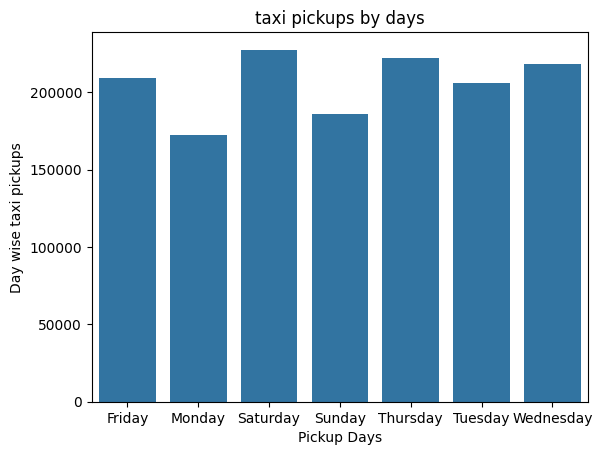

In [115]:
# Find and show the daily trends in taxi pickups (days of the week)
df["tpep_pickup_day"] = df["tpep_pickup_datetime"].dt.day_name()
#plt.figure(figsize=(9,6))
daily_data =  df.groupby("tpep_pickup_day").size().reset_index(name="day_wise_count")
daily_data.head(10)
daily_data.head()
sns.barplot(x="tpep_pickup_day",y="day_wise_count", data = daily_data)
plt.xlabel("Pickup Days")
plt.ylabel("Day wise taxi pickups")
plt.title("taxi pickups by days")
plt.show()



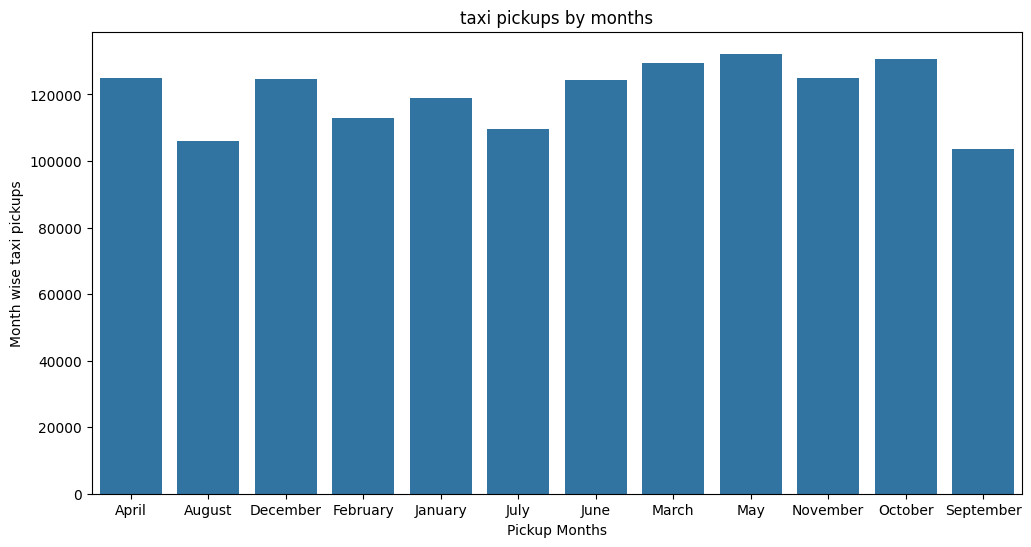

In [116]:
# Show the monthly trends in pickups

df["tpep_pickup_month"] = df["tpep_pickup_datetime"].dt.month_name()
#df.head(12)
plt.figure(figsize=(12,6))
monthly_data =  df.groupby("tpep_pickup_month").size().reset_index(name="month_wise_count")
monthly_data.head(10)
monthly_data.head()
sns.barplot(x="tpep_pickup_month",y="month_wise_count", data = monthly_data)
plt.xlabel("Pickup Months")
plt.ylabel("Month wise taxi pickups")
plt.title("taxi pickups by months")
plt.show()


##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [117]:
# Analyse the above parameters

print("fare_amount",df[df["fare_amount"] <=0].shape)
print("tip_amount",df[df["tip_amount"] <=0].shape)
print("total_amount",df[df["total_amount"] <=0].shape)
print("trip_distance",df[df["trip_distance"] <=0].shape)

fare_amount (0, 23)
tip_amount (316348, 23)
total_amount (0, 23)
trip_distance (0, 23)


Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

In [118]:
df1 = df[df["tip_amount"] > 0]

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [119]:
# Create a df with non zero entries for the selected parameters.

df1[df1["trip_distance"] <= 0].shape
df1[df1["PULocationID"] == df1["DOLocationID"]].shape
df1 = df1[df1["PULocationID"] != df1["DOLocationID"]]
df1.shape

(1087348, 23)

**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

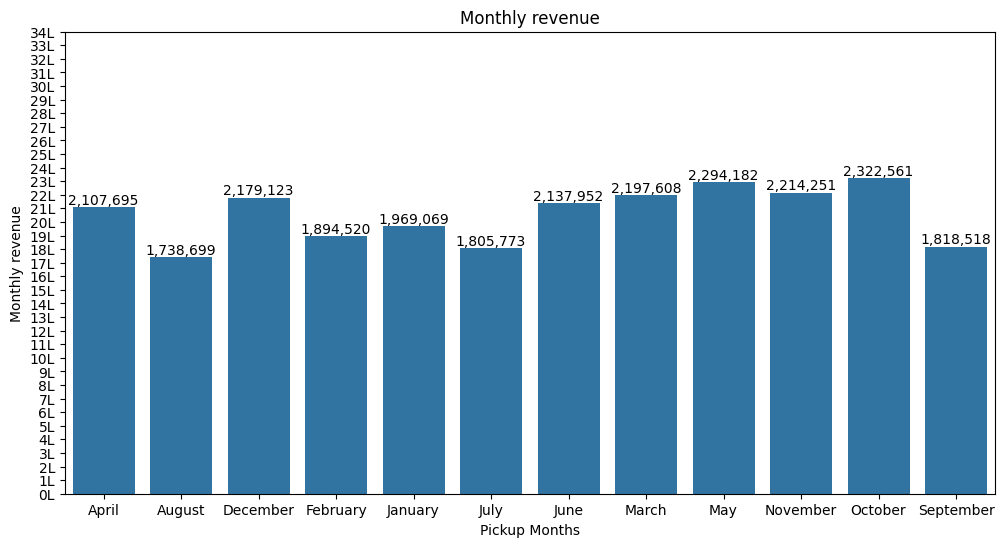

In [120]:
# Group data by month and analyse monthly revenue
df1["tpep_pickup_month"] = df1["tpep_pickup_datetime"].dt.month_name()
#df.head(12)
plt.figure(figsize=(12,6))
monthly_data =  df1.groupby("tpep_pickup_month")["total_amount"].sum().reset_index()
#monthly_data.head(12)
ax = sns.barplot(x="tpep_pickup_month",y="total_amount", data = monthly_data)
plt.xlabel("Pickup Months")
plt.ylabel("Monthly revenue")
plt.title("Monthly revenue")
for p in ax.patches:
    ax.annotate(f'{p.get_height():,.0f}',  # Format as a number with commas
                (p.get_x() + p.get_width() / 2., p.get_height()),  # Position at top of bar
                ha='center', va='bottom',  # Align center and slightly above the bar
                fontsize=10, color='black')

ticks = np.arange(0, 3500000, 100000)
labels = ["{}L".format(i//100000) for i in ticks]
plt.yticks(ticks, labels) #change the plotting lengths using this

plt.show()




**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

<Figure size 1200x600 with 0 Axes>

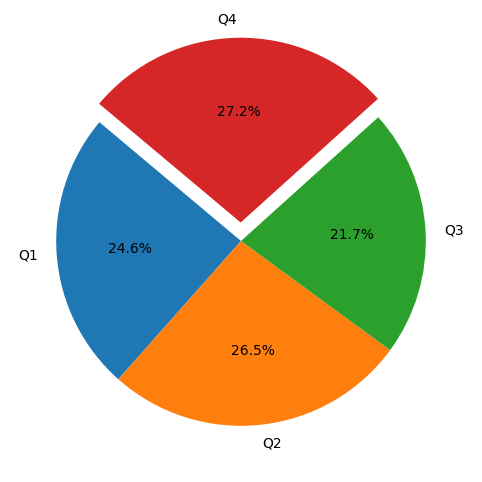

In [121]:
# Calculate proportion of each quarter
df1["tpep_pickup_quarter"] = df1["tpep_pickup_datetime"].dt.quarter
plt.figure(figsize=(12,6))
#df1.head()
quarterly_data =  df1.groupby("tpep_pickup_quarter")["total_amount"].sum().reset_index()
quarterly_data["proportion"] = quarterly_data["total_amount"] / (quarterly_data["total_amount"].sum()) * 100
quarterly_data.head()
plt.figure(figsize=(12,6))
plt.pie(
    quarterly_data["proportion"], 
    labels=["Q1", "Q2", "Q3", "Q4"], 
    autopct="%1.1f%%", 
    startangle=140,
    explode = [0, 0.0, 0, 0.1]
)
plt.show()



**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

In [122]:
# Show how trip fare is affected by distance
df1["fare_amount"].corr(df1["trip_distance"])

np.float64(0.9048186022551292)

**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

In [123]:
# Show relationship between fare and trip duration
datetm = df1["tpep_dropoff_datetime"] - df1["tpep_pickup_datetime"]
df1["trip_duration"] = datetm.dt.total_seconds() / 60
matrix = df1[["fare_amount","trip_duration"]].corr()
plt.figure(figsize=(8,6))
sns.heatmap(matrix, 
            annot=True,        
            cmap="coolwarm",    
            fmt=".2f")  
plt.show()



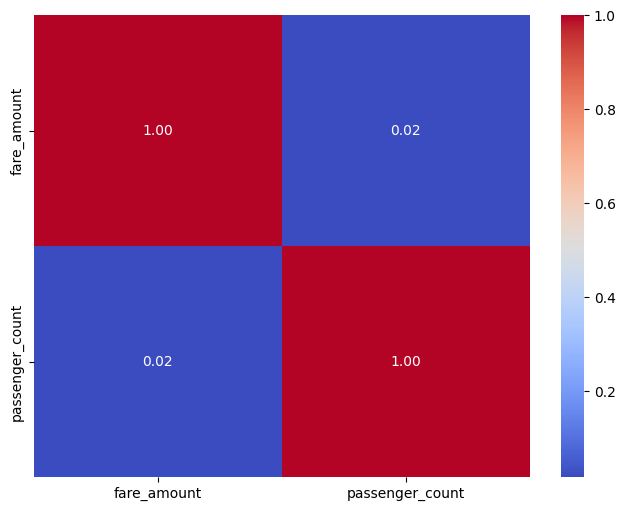

In [124]:
# Show relationship between fare and number of passengers
matrix = df1[["fare_amount","passenger_count"]].corr()
plt.figure(figsize=(8,6))
sns.heatmap(matrix, 
            annot=True,        
            cmap="coolwarm",    
            fmt=".2f")  
plt.show()


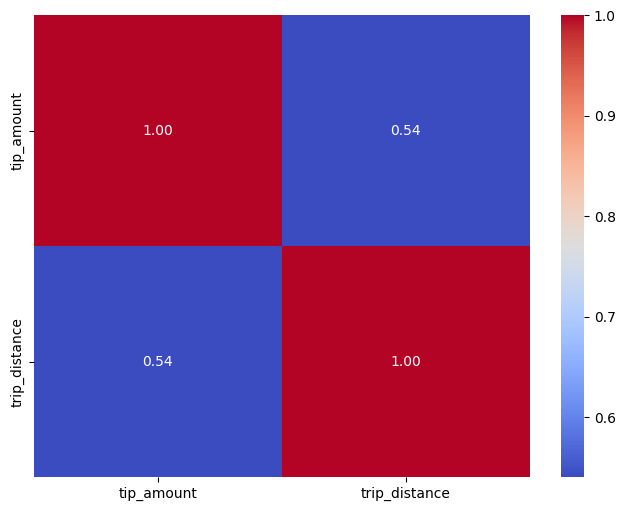

In [125]:
# Show relationship between tip and trip distance
matrix = df1[["tip_amount","trip_distance"]].corr()
plt.figure(figsize=(8,6))
sns.heatmap(matrix, 
            annot=True,        
            cmap="coolwarm",    
            fmt=".2f")  
plt.show()


**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

In [126]:
# Analyse the distribution of different payment types (payment_type).
output = df1["payment_type"].value_counts()
ax = sns.barplot(x=output.index,y=output.values)
for p in ax.patches:
    ax.annotate(f'{p.get_height():,.0f}',  # Format as a number with commas
                (p.get_x() + p.get_width() / 2., p.get_height()),  # Position at top of bar
                ha='center', va='bottom',  # Align center and slightly above the bar
                fontsize=10, color='black')
plt.xlabel("Payment Type")
plt.ylabel("Usage Count")
plt.title("distribution of different payment types")
plt.show()


- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [127]:
# !pip install geopandas

**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [128]:
# import geopandas as gpd
import geopandas as gpd
# Read the shapefile using geopandas
zones = gpd.read_file("/Users/pgovindani/Desktop/AIML-IIITB/Case Studies/EDA_Case_Study/DatasetsDictionary/taxi_zones/taxi_zones.shp")
zones.head()

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...  
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...  
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...  
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...  
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...

Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


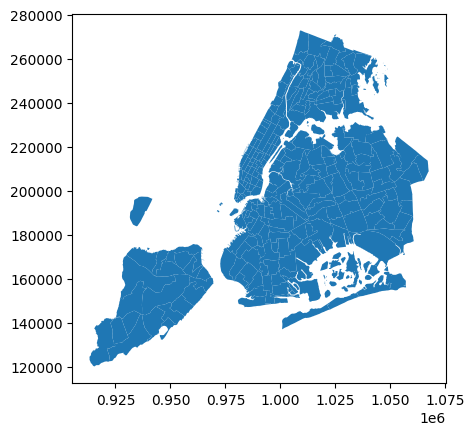

In [129]:
print(zones.info())
zones.plot()
plt.show()

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [130]:
# Merge zones and trip records using locationID and PULocationID
trip_data = df1.merge(zones, left_on="PULocationID", right_on="LocationID", how="left")
trip_data.head(5)

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-12-01 00:12:46   2023-12-01 00:30:53              1.0   
1         2  2023-12-01 00:08:12   2023-12-01 00:13:51              2.0   
2         2  2023-12-01 00:45:48   2023-12-01 00:55:06              1.0   
3         2  2023-12-01 00:58:52   2023-12-01 01:03:47              1.0   
4         1  2023-12-01 00:42:18   2023-12-01 00:50:31              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           4.12         1.0                  N           114           230   
1           1.03         1.0                  N           170           100   
2           1.92         1.0                  N           246           142   
3           1.04         1.0                  N           234            68   
4           1.30         1.0                  N           114           158   

   payment_type  ...  tpep_pickup_month  tpep_pickup_quarter  trip_duration  \
0             1  ...           December                    4      18.116667   
1             1  ...           December                    4       5.650000   
2             1  ...           December                    4       9.300000   
3             1  ...           December                    4       4.916667   
4             1  ...           December                    4       8.216667   

   OBJECTID  Shape_Leng  Shape_Area                       zone  LocationID  \
0     114.0    0.031727    0.000047    Greenwich Village South       114.0   
1     170.0    0.045769    0.000074                Murray Hill       170.0   
2     246.0    0.069467    0.000281  West Chelsea/Hudson Yards       246.0   
3     234.0    0.036072    0.000073                   Union Sq       234.0   
4     114.0    0.031727    0.000047    Greenwich Village South       114.0   

     borough                                           geometry  
0  Manhattan  POLYGON ((986306.712 203122.786, 986300.242 20...  
1  Manhattan  POLYGON ((991999.299 210994.739, 991972.635 21...  
2  Manhattan  POLYGON ((983031.177 217138.506, 983640.32 216...  
3  Manhattan  POLYGON ((987029.847 207022.299, 987048.27 206...  
4  Manhattan  POLYGON ((986306.712 203122.786, 986300.242 20...  

[5 rows x 32 columns]

**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [131]:
# Group data by location and calculate the number of trips
tripcountLocId = trip_data.groupby("LocationID").size().reset_index(name="count_of_trips")
print("\nTop 10 locations sorted by count_of_trips \n")
print(tripcountLocId.sort_values(by="count_of_trips",ascending=False).head(10))
print("\nBottom 10 locations sorted by count_of_trips \n")
print(tripcountLocId.sort_values(by="count_of_trips",ascending=False).tail(10))




Top 10 locations sorted by count_of_trips 

     LocationID  count_of_trips
177       237.0           56789
118       161.0           54764
176       236.0           50292
119       162.0           43539
134       186.0           43078
102       142.0           42062
127       170.0           36089
170       230.0           35270
174       234.0           35159
120       163.0           34737

Bottom 10 locations sorted by count_of_trips 

     LocationID  count_of_trips
87        126.0               1
89        128.0               1
152       208.0               1
151       207.0               1
150       206.0               1
149       205.0               1
156       212.0               1
135       187.0               1
192       259.0               1
191       258.0               1


**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [132]:
# Merge trip counts back to the zones GeoDataFrame
zone_data = zones.merge(tripcountLocId, on="LocationID", how="left")
#zone_data.head(15)
zone_data["count_of_trips"].fillna(0)


0          1.0
1          0.0
2          2.0
3       1268.0
4          0.0
        ...   
258        1.0
259       46.0
260     5318.0
261    16665.0
262    23309.0
Name: count_of_trips, Length: 263, dtype: float64

The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

In [133]:
# Define figure and axis
fig, ax = plt.subplots(figsize=(10, 8))

# Plot the map and display it
zone_data.plot(ax=ax, column="count_of_trips", cmap="BrBG", legend=True, legend_kwds = {'label': "Zone Wise Trips", 'orientation': "vertical"})
plt.show()


In [134]:
zone_data[zone_data["count_of_trips"] == 56789]

OBJECTID  Shape_Leng  Shape_Area                   zone  LocationID  \
236       237    0.042213    0.000096  Upper East Side South         237   

       borough                                           geometry  \
236  Manhattan  POLYGON ((993633.442 216961.016, 993507.232 21...   

     count_of_trips  
236         56789.0

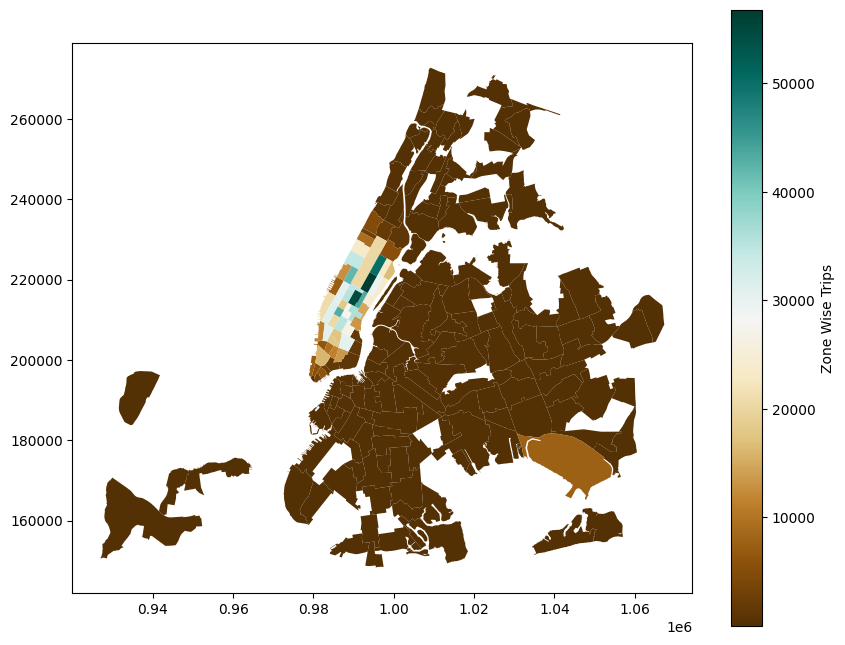

In [135]:
# can you try displaying the zones DF sorted by the number of trips?

zone_data.sort_values(by="count_of_trips",inplace=True)
fig, ax = plt.subplots(figsize=(10, 8))

# Plot the map and display it
zone_data.plot(ax=ax, column="count_of_trips", cmap="BrBG", legend=True, legend_kwds = {'label': "Zone Wise Trips", 'orientation': "vertical"})
plt.show()

Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [136]:
df1["trip_duration"] = df1["trip_duration"]/60
df1["route"] = df1["PULocationID"].astype(str) + " TO " + df1["DOLocationID"].astype(str)
trip_data["route"] = trip_data["PULocationID"].astype(str) + " TO " + trip_data["DOLocationID"].astype(str)

In [137]:
trip_data[(trip_data["trip_duration"] < 0)].shape

(29, 33)

In [138]:

#remove trip_duration where value is less than zero
trip_data_subset = trip_data["trip_duration"] < 0  
#for negative trip_duration swap tpep_dropoff_datetime and tpep_pickup_datetime
trip_data.loc[trip_data_subset, ["tpep_dropoff_datetime", "tpep_pickup_datetime"]] = trip_data.loc[trip_data_subset, ["tpep_pickup_datetime", "tpep_dropoff_datetime"]].values


In [139]:
datetm = trip_data["tpep_dropoff_datetime"] - trip_data["tpep_pickup_datetime"]
trip_data["trip_duration"] = datetm.dt.total_seconds() / 60


In [140]:
speed_output = trip_data.groupby(["route" ,"tpep_pickup_hour"]).agg(trip_distance_sum = ("trip_distance","sum"),trip_duration_mean = ("trip_duration","mean")).reset_index()
speed_output["speed"] = speed_output["trip_distance_sum"]/speed_output["trip_duration_mean"]

In [141]:
trip_data[(trip_data["trip_duration"] < 0)].shape

(0, 33)

In [142]:
speed_output.sort_values(by="speed",ascending=True).head(20)


route  tpep_pickup_hour  trip_distance_sum  trip_duration_mean  \
48034  236 TO 239                 5               1.84         1386.400000   
30028  164 TO 211                 6               2.78         1400.066667   
69813   68 TO 148                 6               3.09         1407.766667   
67024   48 TO 265                18               3.23         1396.916667   
5950    114 TO 48                 8               3.52         1410.183333   
37326  211 TO 255                17               3.61         1434.583333   
44078   232 TO 48                12               4.89         1420.983333   
38201  224 TO 231                 1               5.38         1436.250000   
2689   107 TO 264                17               2.65          703.933333   
18040  143 TO 237                 5               2.74          719.075000   
64333   43 TO 223                 2               5.62         1421.983333   
26131  162 TO 106                17               6.24         1428.366667   
29963  164 TO 186                 5               2.07          470.322222   
72693   75 TO 263                 3               1.18          246.150000   
2556    107 TO 25                 7               4.81          974.883333   
14018   140 TO 43                 2               3.54          699.075000   
49989   237 TO 65                15               7.45         1439.266667   
54797   246 TO 37                18               8.25         1414.433333   
5003   114 TO 144                 4               2.89          482.744444   
33491   181 TO 14                21               8.47         1403.766667   

          speed  
48034  0.001327  
30028  0.001986  
69813  0.002195  
67024  0.002312  
5950   0.002496  
37326  0.002516  
44078  0.003441  
38201  0.003746  
2689   0.003765  
18040  0.003810  
64333  0.003952  
26131  0.004369  
29963  0.004401  
72693  0.004794  
2556   0.004934  
14018  0.005064  
49989  0.005176  
54797  0.005833  
5003   0.005987  
33491  0.006034

How does identifying high-traffic, high-demand routes help us?

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

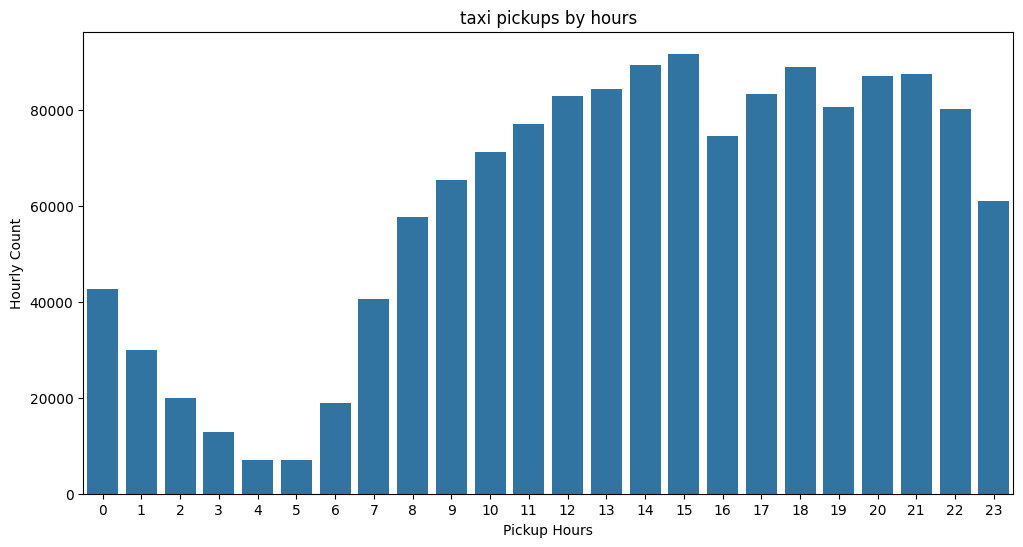

In [143]:
# Visualise the number of trips per hour and find the busiest hour
plt.figure(figsize=(12,6))
hourly_data =  df.groupby("tpep_pickup_hour").size().reset_index(name="hourly_count")
sns.barplot(x="tpep_pickup_hour",y="hourly_count", data = hourly_data)
plt.xlabel("Pickup Hours")
plt.ylabel("Hourly Count")
plt.title("taxi pickups by hours")
plt.show()


Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

In [144]:
# Scale up the number of trips

# Fill in the value of your sampling fraction and use that to scale up the numbers
sample_fraction = 0.05
hourly_data =  df.groupby("tpep_pickup_hour").size().reset_index(name="hourly_count")
busiest_sampling_hours = hourly_data.nlargest(5,"hourly_count")
busiest_sampling_hours["actual_trip_count"] = busiest_sampling_hours["hourly_count"] / sample_fraction
print(busiest_sampling_hours)



    tpep_pickup_hour  hourly_count  actual_trip_count
15                15         91754          1835080.0
14                14         89345          1786900.0
18                18         89076          1781520.0
21                21         87508          1750160.0
20                20         87029          1740580.0


**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

In [145]:
df1["tpep_pickup_day_1"] = df1["tpep_pickup_datetime"].dt.weekday
tripCountByDayAndHour = df1.groupby(["tpep_pickup_day_1", "tpep_pickup_hour"], as_index = False).size()
tripCountByDayAndHour["day_type"] = tripCountByDayAndHour["tpep_pickup_day_1"].apply(lambda x : "Weekday" if x <=4 else "Weekend")
aggTripsByDayType = tripCountByDayAndHour.groupby(["tpep_pickup_hour", "day_type"], as_index=False)["size"].median()
ax = pd.pivot_table(data=aggTripsByDayType, values="size", index="tpep_pickup_hour", columns="day_type").plot(figsize=[10,6], marker="o")
ticks = np.arange(0, 24, 1)
labels = [i for i in ticks]
ax.set_xticks(ticks)  
ax.set_xticklabels(labels, rotation=60)  
ax.set_title("Hourly Traffic Trends on weekdays and weekends")
plt.show()

What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

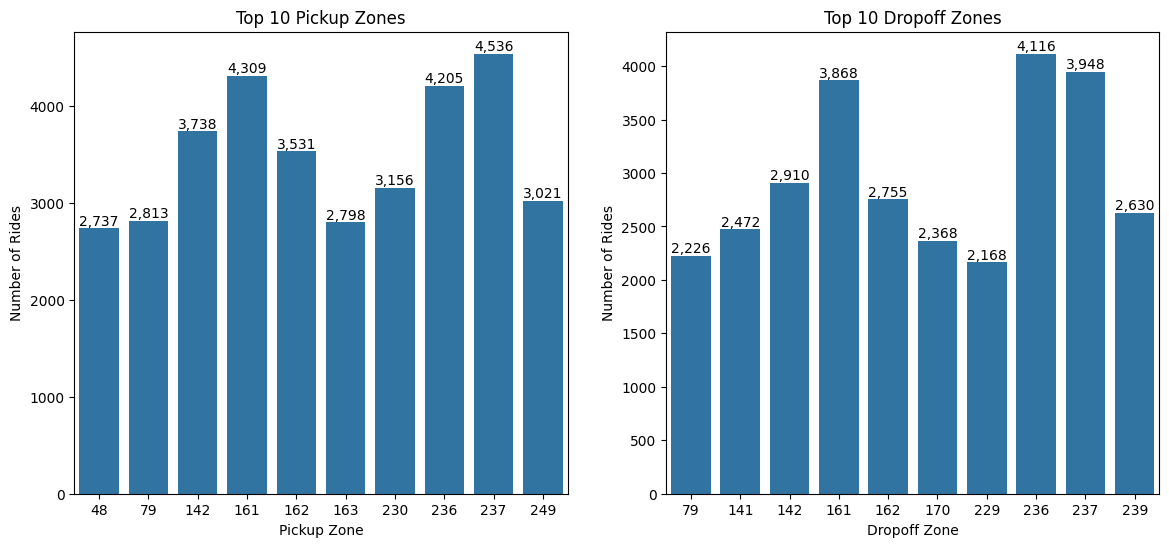

In [146]:
# Find top 10 pickup and dropoff zones

pickup_hourly_data =  df1.groupby(["PULocationID","tpep_pickup_hour"]).size().reset_index(name="PU_hourly_ride_count")
pickup_hourly_data.sort_values(by="PU_hourly_ride_count", ascending=False, inplace=True)
busiest_pickup_hours = pickup_hourly_data.drop_duplicates(subset=["PULocationID"]).head(10)

df1["tpep_dropoff_hour"] = df1["tpep_dropoff_datetime"].dt.hour
dropoff_hourly_data =  df1.groupby(["DOLocationID","tpep_dropoff_hour"]).size().reset_index(name="DO_hourly_ride_count")
dropoff_hourly_data.sort_values(by="DO_hourly_ride_count", ascending=False, inplace=True)
busiest_dropoff_hours = dropoff_hourly_data.drop_duplicates(subset=["DOLocationID"]).head(10)

#print("Busiest Pickup Hours",busiest_pickup_hours)
#print("Busiest Drop Off Hours",busiest_dropoff_hours)

fig, axes = plt.subplots(1, 2, figsize=(14, 6))
ax1 = sns.barplot(x="PULocationID", y="PU_hourly_ride_count", data=busiest_pickup_hours,  ax=axes[0])
axes[0].set_title("Top 10 Pickup Zones")
axes[0].set_xlabel("Pickup Zone")
axes[0].set_ylabel("Number of Rides")
for p in ax1.patches:
    ax1.annotate(f'{p.get_height():,.0f}',  # Format as a number with commas
                (p.get_x() + p.get_width() / 2., p.get_height()),  # Position at top of bar
                ha='center', va='bottom',  # Align center and slightly above the bar
                fontsize=10, color='black')

ax2 = sns.barplot(x="DOLocationID", y="DO_hourly_ride_count", data=busiest_dropoff_hours,  ax=axes[1])
axes[1].set_title("Top 10 Dropoff Zones")
axes[1].set_xlabel("Dropoff Zone")
axes[1].set_ylabel("Number of Rides")
for p in ax2.patches:
    ax2.annotate(f'{p.get_height():,.0f}',  # Format as a number with commas
                (p.get_x() + p.get_width() / 2., p.get_height()),  # Position at top of bar
                ha='center', va='bottom',  # Align center and slightly above the bar
                fontsize=10, color='black')

plt.show()

**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

In [147]:
# Find the top 10 and bottom 10 pickup/dropoff ratios
#df1["PUToDO"] = df

merged_hourly_data = pickup_hourly_data.merge(dropoff_hourly_data,how="left",left_on="PULocationID",right_on="DOLocationID")
merged_hourly_data["PUToDO"] = (merged_hourly_data["PU_hourly_ride_count"]/merged_hourly_data["DO_hourly_ride_count"])

top10PUDORatios = merged_hourly_data.nlargest(1000,"PUToDO")
top10PUDORatios = top10PUDORatios.drop_duplicates(subset=["PULocationID"])
top10PUDORatios = top10PUDORatios.nlargest(10,"PUToDO")
bottom10PUDORatios = merged_hourly_data.nsmallest(1000,"PUToDO")
bottom10PUDORatios  = bottom10PUDORatios.drop_duplicates(subset=["PULocationID"])
bottom10PUDORatios = bottom10PUDORatios.nsmallest(10,"PUToDO")
print("\n\033top10PUDORatios\033 \n", top10PUDORatios[["PULocationID", "PU_hourly_ride_count", "DO_hourly_ride_count","PUToDO"]])
print("\n\033bottom10PUDORatios\033\n", bottom10PUDORatios[["PULocationID", "PU_hourly_ride_count", "DO_hourly_ride_count","PUToDO"]])


#plt.show()



top10PUDORatios 
        PULocationID  PU_hourly_ride_count  DO_hourly_ride_count      PUToDO
12429           132                   782                   1.0  782.000000
10751           144                   914                   9.0  101.555556
6983            113                  1383                  18.0   76.833333
3479             43                  2008                  27.0   74.370370
23              237                  4536                  61.0   74.360656
3911            114                  1909                  26.0   73.423077
13486           211                   659                   9.0   73.222222
1895            239                  2431                  37.0   65.702703
959             249                  3021                  46.0   65.673913
4319            148                  1835                  28.0   65.535714

bottom10PUDORatios
        PULocationID  PU_hourly_ride_count  DO_hourly_ride_count    PUToDO
56661             4                     1     

**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

In [148]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones
df2 = df1[df1["tpep_pickup_hour"].isin([23,0,1,2,3,4,5])]
#df2.sample(20)

pickup_hourly_data =  df2.groupby(["PULocationID","tpep_pickup_hour"]).size().reset_index(name="PU_hourly_ride_count")

df2 = df1[df1["tpep_dropoff_hour"].isin([23,0,1,2,3,4,5])]

merged_hourly_data = pickup_hourly_data.merge(dropoff_hourly_data,how="left",left_on="PULocationID",right_on="DOLocationID")

merged_hourly_data["traffic"] = merged_hourly_data["PU_hourly_ride_count"] + merged_hourly_data["DO_hourly_ride_count"]
merged_hourly_data.sort_values(by="traffic", ascending=False)
merged_hourly_data = merged_hourly_data.drop_duplicates(subset=["PULocationID"])
top10heavytrafficzones = merged_hourly_data.nlargest(10,"traffic")
bottom10heavytrafficzones = merged_hourly_data.nsmallest(10,"traffic")
print("\n\033top10heavytrafficzones\033\n", top10heavytrafficzones[["PULocationID","traffic"]])
print("\n\033bottom10heavytrafficzones\033\n", bottom10heavytrafficzones[["PULocationID","traffic"]])



top10heavytrafficzones
        PULocationID  traffic
3886             79     4923
8881            161     4800
13344           237     4518
14293           249     4423
13176           236     4373
7310            142     3730
2322             48     3487
9049            162     3394
12323           230     3336
12995           234     3245

bottom10heavytrafficzones
        PULocationID  traffic
3866             78        2
6119            117        2
8582            154        2
0                 1        3
3249             67        3
10037           175        3
10872           200        3
13163           235        3
11120           210        4
345               9        5


Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

In [149]:
# Filter for night hours (11 PM to 5 AM)

df1["hour_type"] = df1["tpep_pickup_hour"].apply(lambda x : "Night_hours" if x in [23,0,1,2,3,4,5] else "Daytime")

temp = df1.groupby("hour_type")["total_amount"].sum().reset_index(name="total_amount_sum")
total_sum = df1["total_amount"].sum()
night_hour_sum= temp.loc[temp["hour_type"] == "Night_hours", "total_amount_sum"].sum()
daytime_sum= temp.loc[temp["hour_type"] == "Daytime", "total_amount_sum"].sum()
temp["revenue_share"] = temp.apply(
    lambda x: (night_hour_sum/total_sum) 
              if x["hour_type"] == "Night_hours" 
              else (daytime_sum/total_sum), 
    axis=1
)
temp.sort_values(by="hour_type", inplace=True)

plt.pie(
    temp["revenue_share"], 
    labels=["Daytime","Night_hours"], 
    autopct="%1.1f%%", 
    startangle=140,
    explode = [0, 0.01]
)
#df1[["revenue_share","hour_type"]].sample(20)
plt.show()



##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

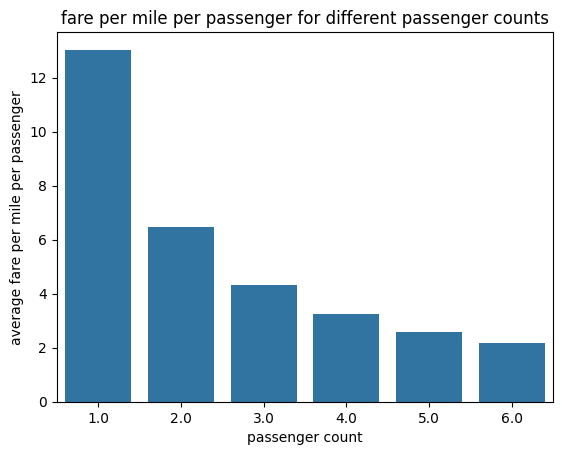

In [150]:
# Analyse the fare per mile per passenger for different passenger counts
df1["farePerMilePerPassenger"] = (df1["total_amount"]/df1["trip_distance"])/df1["passenger_count"]
perpassengerfare = df1.groupby("passenger_count")["farePerMilePerPassenger"].mean().reset_index(name="meanfareperpassenger")
sns.barplot(x="passenger_count",y="meanfareperpassenger", data = perpassengerfare)
plt.xlabel("passenger count")
plt.ylabel("average fare per mile per passenger")
plt.title("fare per mile per passenger for different passenger counts")
plt.show()


**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

In [151]:
# Compare the average fare per mile for different days and for different times of the day
df1["farePerMile"] = (df1["total_amount"]/df1["trip_distance"])

fig, axes = plt.subplots(1, 2, figsize=(16, 6),  sharey=True)
permilefare = df1.groupby("tpep_pickup_hour")["farePerMile"].mean().reset_index(name="meanfarepermile")
ax1 = sns.barplot(x="tpep_pickup_hour",y="meanfarepermile", data = permilefare, ax=axes[0])
axes[0].set_xlabel("Pickup Hours")
axes[0].set_ylabel("average fare per mile ")
axes[0].set_title("average fare per mile for different times of the day")
for p in ax1.patches:
    ax1.annotate(f'{p.get_height():,.0f}',  # Format as a number with commas
                (p.get_x() + p.get_width() / 2., p.get_height()),  # Position at top of bar
                ha='center', va='bottom',  # Align center and slightly above the bar
                fontsize=10, color='black')

permilefare = df1.groupby("tpep_pickup_day")["farePerMile"].mean().reset_index(name="meanfarepermile")
ax2= sns.barplot(x="tpep_pickup_day",y="meanfarepermile", data = permilefare, ax=axes[1])
axes[1].set_xlabel("Pickup Days")
axes[1].set_ylabel("average fare per mile")
axes[1].set_title("average fare per mile for different days")
for p in ax2.patches:
    ax2.annotate(f'{p.get_height():,.0f}',  # Format as a number with commas
                (p.get_x() + p.get_width() / 2., p.get_height()),  # Position at top of bar
                ha='center', va='bottom',  # Align center and slightly above the bar
                fontsize=10, color='black')
plt.tight_layout()
plt.show()



**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

In [152]:
# Compare fare per mile for different vendors
permilefare = df1.groupby(["VendorID","tpep_pickup_hour"])["farePerMile"].mean().reset_index(name="meanfarepermile")
plt.figure(figsize=(12,5))
ax = sns.lineplot(x="tpep_pickup_hour", y="meanfarepermile", hue="VendorID", data=permilefare, marker="o")
ticks = np.arange(0, 24, 1)
labels = [i for i in ticks]
plt.xticks(ticks, labels)
plt.xlabel("Pickup Hours")
plt.ylabel("Average fare per mile")
plt.title("Fare per mile for different vendors")
plt.show()


**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


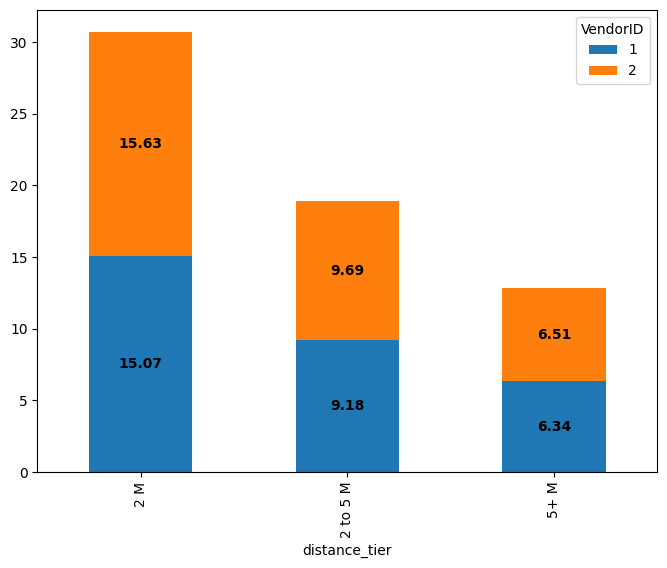

In [153]:
# Defining distance tiers
df1["distance_tier"] = df1["trip_distance"].apply(
        lambda x : "2 M" if x <= 2 else 
                    "2 to 5 M" if x <= 5 else 
                    "5+ M")

fare_tiered_fashion = df1.pivot_table(index="distance_tier", columns="VendorID", values="farePerMile", aggfunc=np.mean)
fare_tiered_fashion.head(10)
ax = fare_tiered_fashion.plot(kind="bar", stacked=True, figsize=(8, 6))
for p in ax.containers:
    ax.bar_label(p, fmt='%.2f', label_type='center', color="black", fontsize=10, weight="bold")



##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

In [154]:
#  Analyze tip percentages based on distances, passenger counts and pickup times

df1["tip_percentage"] = (df1["tip_amount"]/df1["total_amount"])*100
tip_tripDistance = df1.pivot_table(index = "trip_distance" , values = "tip_percentage" ,aggfunc=np.mean).reset_index()
tip_PassengerCount = df1.pivot_table(index = "passenger_count" , values = "tip_percentage" ,aggfunc=np.mean)
tip_PickupHour = df1.pivot_table(index = "tpep_pickup_hour" , values = "tip_percentage" ,aggfunc=np.mean)

tip_tripDistance.sort_values(by="tip_percentage",inplace=True, ascending=False)
tip_PassengerCount.sort_values(by="tip_percentage",inplace=True, ascending=False)
tip_PickupHour.sort_values(by="tip_percentage",inplace=True, ascending=False)

fig, axes = plt.subplots(3, 1, figsize=(14, 28))

tip_tripDistance['x_bin'] = pd.cut(tip_tripDistance["trip_distance"], bins=20)  
derived_tip_tripDistance = tip_tripDistance.groupby('x_bin')['tip_percentage'].mean().reset_index()
ax1 = sns.barplot(data=derived_tip_tripDistance,x="x_bin",y="tip_percentage", ax=axes[0])
for p in ax1.patches:
    ax1.annotate(f'{p.get_height():,.0f}',  # Format as a number with commas
                (p.get_x() + p.get_width() / 2., p.get_height()),  # Position at top of bar
                ha='center', va='bottom',  # Align center and slightly above the bar
                fontsize=10, color='black')
axes[0].set_title("Tip Percentage vs Trip Distance")
axes[0].set_xlabel("Trip Distance")
axes[0].set_ylabel("Tip Percentage")
axes[0].tick_params(axis='x', rotation=60)



ax2 = sns.barplot(data=tip_PassengerCount,x="passenger_count",y="tip_percentage", ax=axes[1])
axes[1].set_title("Tip Percentage vs Passenger Count")
axes[1].set_xlabel("Passenger Count")
axes[1].set_ylabel("Tip Percentage")
axes[1].tick_params(axis='x', rotation=60)
for p in ax2.patches:
    ax2.annotate(f'{p.get_height():,.0f}',  # Format as a number with commas
                (p.get_x() + p.get_width() / 2., p.get_height()),  # Position at top of bar
                ha='center', va='bottom',  # Align center and slightly above the bar
                fontsize=10, color='black')

ax3 = sns.barplot(data=tip_PickupHour,x="tpep_pickup_hour",y="tip_percentage", ax=axes[2])
axes[2].set_title("Tip Percentage vs Pickup Hours")
axes[2].set_xlabel("Pickup Hours")
axes[2].set_ylabel("Tip Percentage")
axes[2].tick_params(axis='x', rotation=60)
for p in ax3.patches:
    ax3.annotate(f'{p.get_height():,.0f}',  # Format as a number with commas
                (p.get_x() + p.get_width() / 2., p.get_height()),  # Position at top of bar
                ha='center', va='bottom',  # Align center and slightly above the bar
                fontsize=10, color='black')


plt.tight_layout()
plt.show()


Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

In [155]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%



**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

In [156]:
# See how passenger count varies across hours and days
hourly_data =  df1.groupby("tpep_pickup_hour")["passenger_count"].median().reset_index(name="passenger_hourly_count")
print("\033[1mHourly Passenger count\033[0m \n")
print(hourly_data.head(24))
daily_data =  df1.groupby("tpep_pickup_day")["passenger_count"].median().reset_index(name="passenger_daily_count")
print("\n\n \033[1mDaily Passenger count\033[0m \n")
print(daily_data.head(10))


Hourly Passenger count 

    tpep_pickup_hour  passenger_hourly_count
0                  0                     1.0
1                  1                     1.0
2                  2                     1.0
3                  3                     1.0
4                  4                     1.0
5                  5                     1.0
6                  6                     1.0
7                  7                     1.0
8                  8                     1.0
9                  9                     1.0
10                10                     1.0
11                11                     1.0
12                12                     1.0
13                13                     1.0
14                14                     1.0
15                15                     1.0
16                16                     1.0
17                17                     1.0
18                18                     1.0
19                19                     1.0
20                20          

**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

In [158]:
# How does passenger count vary across zones

#trip_data.columns
zone_wise_data = trip_data.groupby("zone")["passenger_count"].mean().reset_index()
fig = px.bar(x=zone_wise_data["zone"],y=zone_wise_data["passenger_count"])
fig.update_layout(
    width=1500,
    xaxis_tickangle=-90, 
    xaxis=dict(title="zone",tickfont=dict(size=5)),  
    yaxis=dict(title="average passenger count"),  
    title="passenger count vary across zones", 
)
fig.show()

In [159]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
# Create a new column for the average passenger count in each zone.
#trip_data.merge(zone_wise_data,lefton="zone",right)
df5 = trip_data.merge(zone_wise_data, left_on="zone", right_on="zone", how="left")
df5.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count_x  \
0         2  2023-12-01 00:12:46   2023-12-01 00:30:53                1.0   
1         2  2023-12-01 00:08:12   2023-12-01 00:13:51                2.0   
2         2  2023-12-01 00:45:48   2023-12-01 00:55:06                1.0   
3         2  2023-12-01 00:58:52   2023-12-01 01:03:47                1.0   
4         1  2023-12-01 00:42:18   2023-12-01 00:50:31                1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           4.12         1.0                  N           114           230   
1           1.03         1.0                  N           170           100   
2           1.92         1.0                  N           246           142   
3           1.04         1.0                  N           234            68   
4           1.30         1.0                  N           114           158   

   payment_type  ...  trip_duration  OBJECTID  Shape_Leng  Shape_Area  \
0             1  ...      18.116667     114.0    0.031727    0.000047   
1             1  ...       5.650000     170.0    0.045769    0.000074   
2             1  ...       9.300000     246.0    0.069467    0.000281   
3             1  ...       4.916667     234.0    0.036072    0.000073   
4             1  ...       8.216667     114.0    0.031727    0.000047   

                        zone  LocationID    borough  \
0    Greenwich Village South       114.0  Manhattan   
1                Murray Hill       170.0  Manhattan   
2  West Chelsea/Hudson Yards       246.0  Manhattan   
3                   Union Sq       234.0  Manhattan   
4    Greenwich Village South       114.0  Manhattan   

                                            geometry       route  \
0  POLYGON ((986306.712 203122.786, 986300.242 20...  114 TO 230   
1  POLYGON ((991999.299 210994.739, 991972.635 21...  170 TO 100   
2  POLYGON ((983031.177 217138.506, 983640.32 216...  246 TO 142   
3  POLYGON ((987029.847 207022.299, 987048.27 206...   234 TO 68   
4  POLYGON ((986306.712 203122.786, 986300.242 20...  114 TO 158   

   passenger_count_y  
0           1.432068  
1           1.325556  
2           1.418609  
3           1.349014  
4           1.432068  

[5 rows x 34 columns]

Find out how often surcharges/extra charges are applied to understand their prevalance

In [160]:
print("Rows where improvement_surcharge is zero", df1[df1["improvement_surcharge"] == 0].shape )
print("Rows where congestion_surcharge is zero",df1[df1["congestion_surcharge"] == 0].shape )
print("Rows where extra is zero",df1[df1["extra"] == 0].shape )

Rows where improvement_surcharge is zero (0, 33)
Rows where congestion_surcharge is zero (21829, 33)
Rows where extra is zero (425989, 33)


In [161]:
#
df1['congestion_surcharge'] = df1['congestion_surcharge'].replace(0, np.nan)
df1['extra'] = df1['extra'].replace(0, np.nan)

In [162]:
print("Rows where improvement_surcharge is zero", df1[df1["improvement_surcharge"] == 0].shape )
print("Rows where congestion_surcharge is zero",df1[df1["congestion_surcharge"] == 0].shape )
print("Rows where extra is zero",df1[df1["extra"] == 0].shape )

Rows where improvement_surcharge is zero (0, 33)
Rows where congestion_surcharge is zero (0, 33)
Rows where extra is zero (0, 33)


**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

In [163]:
# How often is each surcharge applied?
pickuphours = df1.groupby("tpep_pickup_hour").agg(
    improvement_surcharge_count = ("improvement_surcharge","count"), 
    congestion_surcharge_count = ("congestion_surcharge","count"), 
    extra_count = ("extra","count")).reset_index()
dropoffhours = df1.groupby("tpep_dropoff_hour").agg(
    improvement_surcharge_count = ("improvement_surcharge","count"), 
    congestion_surcharge_count = ("congestion_surcharge","count"), 
    extra_count = ("extra","count")).reset_index()
pickupzones = df1.groupby("PULocationID").agg(
    improvement_surcharge_count = ("improvement_surcharge","count"), 
    congestion_surcharge_count = ("congestion_surcharge","count"), 
    extra_count = ("extra","count")).reset_index()
dropoffupzones = df1.groupby("DOLocationID").agg(
    improvement_surcharge_count = ("improvement_surcharge","count"), 
    congestion_surcharge_count = ("congestion_surcharge","count"), 
    extra_count = ("extra","count")).reset_index()





In [164]:


x = np.arange(len(pickuphours["tpep_pickup_hour"])) 
width = 0.25  # Width of bars
plt.figure(figsize=(10, 6))
plt.bar(x - width, pickuphours["improvement_surcharge_count"], width, label="Improvement Surcharge")
plt.bar(x, pickuphours["congestion_surcharge_count"], width, label="Congestion Surcharge")
plt.bar(x + width, pickuphours["extra_count"], width, label="Extra Charge")
plt.ylabel("Count")
plt.title("Grouped Bar Chart for Pickup Hours")
plt.xticks(x, pickuphours["tpep_pickup_hour"])  
plt.legend()
plt.show()



In [165]:
x = np.arange(len(dropoffhours["tpep_dropoff_hour"])) 
width = 0.25  # Width of bars
plt.figure(figsize=(10, 6))
plt.bar(x - width, dropoffhours["improvement_surcharge_count"], width, label="Improvement Surcharge")
plt.bar(x, dropoffhours["congestion_surcharge_count"], width, label="Congestion Surcharge")
plt.bar(x + width, dropoffhours["extra_count"], width, label="Extra Charge")
plt.ylabel("Count")
plt.title("Grouped Bar Chart for Drop off Hours")
plt.xticks(x, dropoffhours["tpep_dropoff_hour"])  
plt.legend()
plt.show()

In [166]:
pickupzones.sort_values(by="improvement_surcharge_count", ascending=False).head(10)

PULocationID  improvement_surcharge_count  congestion_surcharge_count  \
177           237                        56789                       56759   
118           161                        54764                       54718   
176           236                        50292                       50157   
119           162                        43539                       43509   
134           186                        43078                       43047   
102           142                        42062                       42029   
127           170                        36089                       36068   
170           230                        35270                       35240   
174           234                        35159                       35142   
120           163                        34737                       34713   

     extra_count  
177        31245  
118        34430  
176        24967  
119        26310  
134        24842  
102        26040  
127        21289  
170        23830  
174        22779  
120        21636

In [ ]:
pickupzones.sort_values(by="congestion_surcharge_count", ascending=False).head(10)

PULocationID  improvement_surcharge_count  congestion_surcharge_count  \
177           237                        56789                       56759   
118           161                        54764                       54718   
176           236                        50292                       50157   
119           162                        43539                       43509   
134           186                        43078                       43047   
102           142                        42062                       42029   
127           170                        36089                       36068   
170           230                        35270                       35240   
174           234                        35159                       35142   
120           163                        34737                       34713   

     extra_count  
177        31245  
118        34430  
176        24967  
119        26310  
134        24842  
102        26040  
127        21289  
170        23830  
174        22779  
120        21636

In [ ]:
pickupzones.sort_values(by="extra_count", ascending=False).head(10)

PULocationID  improvement_surcharge_count  congestion_surcharge_count  \
118           161                        54764                       54718   
177           237                        56789                       56759   
119           162                        43539                       43509   
102           142                        42062                       42029   
176           236                        50292                       50157   
134           186                        43078                       43047   
170           230                        35270                       35240   
54             79                        30525                       30507   
186           249                        30716                       30680   
174           234                        35159                       35142   

     extra_count  
118        34430  
177        31245  
119        26310  
102        26040  
176        24967  
134        24842  
170        23830  
54         23684  
186        23100  
174        22779

In [ ]:
dropoffupzones.sort_values(by="extra_count", ascending=False).head(10)

DOLocationID  improvement_surcharge_count  congestion_surcharge_count  \
213           236                        53495                       53148   
214           237                        49363                       49316   
154           170                        35639                       35609   
216           239                        34551                       34504   
125           141                        32544                       32521   
145           161                        44761                       44737   
126           142                        34526                       34497   
72             79                        25107                       25082   
215           238                        27650                       26735   
206           229                        26891                       26872   

     extra_count  
213        30583  
214        26268  
154        21616  
216        21201  
125        21080  
145        20508  
126        20471  
72         18559  
215        17433  
206        17428

In [ ]:
dropoffupzones.sort_values(by="congestion_surcharge_count", ascending=False).head(10)

DOLocationID  improvement_surcharge_count  congestion_surcharge_count  \
213           236                        53495                       53148   
214           237                        49363                       49316   
145           161                        44761                       44737   
154           170                        35639                       35609   
216           239                        34551                       34504   
126           142                        34526                       34497   
146           162                        33445                       33415   
125           141                        32544                       32521   
211           234                        30225                       30200   
61             68                        29566                       29540   

     extra_count  
213        30583  
214        26268  
145        20508  
154        21616  
216        21201  
126        20471  
146        17038  
125        21080  
211        17119  
61         17377

In [ ]:
dropoffupzones.sort_values(by="improvement_surcharge_count", ascending=False).head(10)

DOLocationID  improvement_surcharge_count  congestion_surcharge_count  \
213           236                        53495                       53148   
214           237                        49363                       49316   
145           161                        44761                       44737   
154           170                        35639                       35609   
216           239                        34551                       34504   
126           142                        34526                       34497   
146           162                        33445                       33415   
125           141                        32544                       32521   
211           234                        30225                       30200   
61             68                        29566                       29540   

     extra_count  
213        30583  
214        26268  
145        20508  
154        21616  
216        21201  
126        20471  
146        17038  
125        21080  
211        17119  
61         17377

## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

In [ ]:
# 1. Dispatch more cabs to high demand zones
# 2. Increase availability of cab during the hours where the demand is more for example increase cab availability during weekend night hours
# 3. For slow routes, use maps api to figure out an alternative route. With Given data, we cannot optimize routing
# 4. Increase availability of cab in holiday season
# Reduce cab availability is low demand zones


**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

In [ ]:
# 1. Dispatch more cabs to high demand zones
# Reduce cab availability is low demand zones


**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.

In [ ]:
#Increase fares in October and May months
#Increase fares over weekends during night time.
#Increase fares over weekdays afternoon and evening timings
#Increase fares on Thursdays and Saturdays
#Give discounts on Mondays 